## ENTREGA FINAL MACHINE LEARNING
### Integrantes del Grupo: Marta Guzmán González, Javier Sanz Heredia y David Villoria Delgado
### Aseguradora detección de siniestro




Este conjunto de datos contiene datos de colisión para accidentes automovilísticos en Canadá de 1999 a 2014 según lo proporcionado por Transport Canada. El dataset proporciona varias características, resumidas en las siguientes tablas:

##### Datos sobre el nivel de colisión:
| Atributo | descripción |
| :- |:- |
|*C_YEAR*| Año|
|*C_MNTH*| Mes|
|*C_WDAY*| Día de la semana|
|*C_HOUR*| Hora de la colisión|
|*C_SEV*| Gravedad de la colisión|
|*C_VEHS*| Número de vehículos involucardos en la colisión|
|*C_CONF*| Configuración de la colisión|
|*C_RCFG*| Configuración de la carretera|
|*C_WTHR*| Condiciones climáticas|
|*C_RSUR*| Superficie de la carretera|
|*C_RALN*| Alineación de la carretera|
|*C_TRAF*| Control del tráfico|

##### Datos sobre el nivel del vehículo:
| Atributo | descripción |
| :- |:- |
|*V_ID*| Número de secuencia del vehículo|
|*V_TYPE*| Tipo de vehículo|
|*V_YEAR*| Año del modelo del vehículo|


##### Datos sobre el nivel de la persona:

| Atributo | descripción |
| :- |:- |
|*P_ID*| Año|
|*P_SEX*| Sexo|
|*P_AGE*| Edad|
|*P_PSN*| Posición en el vehículo|
|*P_ISEV*| Requiere tratamiento médico|
|*P_SAFE*| Dispositivos de seguridad utilizados|
|*P_USER*| Clase de usuario de la carretera|

## 0. Lectura de datos

https://www.kaggle.com/datasets/tbsteal/canadian-car-accidents-19942014?select=drivingLegend.pdf++NCDB_1999_to_2014.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns                       #visualizacion
import matplotlib.pyplot as plt             #visualizacion
%matplotlib inline     
sns.set(color_codes=True)
import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)
import scipy.stats as ss

In [2]:
df = pd.read_csv("NCDB_1999_to_2014.csv", sep = ",", na_values = ['U','UU','UUUU'])

In [3]:
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,1.0,06,1990,01,M,41,11,1,NaN,1.0
1,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,2.0,01,1987,01,M,19,11,1,NaN,1.0
2,1999,1.0,1.0,20.0,2,2.0,34,NaN,1,5,...,2.0,01,1987,02,F,20,13,2,02,2.0
3,1999,1.0,1.0,8.0,2,1.0,01,NaN,5,3,...,1.0,01,1986,01,M,46,11,1,NaN,1.0
4,1999,1.0,1.0,8.0,2,1.0,01,NaN,5,3,...,99.0,NN,NNNN,01,M,05,99,2,NaN,3.0


In [4]:
df.shape

(5860405, 22)

In [5]:
df.columns

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER'],
      dtype='object')

## **1. Análisis Descriptivo Inicial**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column  Dtype  
---  ------  -----  
 0   C_YEAR  int64  
 1   C_MNTH  float64
 2   C_WDAY  float64
 3   C_HOUR  float64
 4   C_SEV   int64  
 5   C_VEHS  float64
 6   C_CONF  object 
 7   C_RCFG  object 
 8   C_WTHR  object 
 9   C_RSUR  object 
 10  C_RALN  object 
 11  C_TRAF  object 
 12  V_ID    float64
 13  V_TYPE  object 
 14  V_YEAR  object 
 15  P_ID    object 
 16  P_SEX   object 
 17  P_AGE   object 
 18  P_PSN   object 
 19  P_ISEV  object 
 20  P_SAFE  object 
 21  P_USER  float64
dtypes: float64(6), int64(2), object(14)
memory usage: 983.6+ MB


Hay algunas de estas variables que no son de utilidad para una clasificación como son 'P_ID' y 'V_ID'.

In [7]:
df = df.drop(['P_ID','V_ID'], axis=1)
df.shape

(5860405, 20)

Vamos a corregir el tipo de 'P_USER' que no tiene sentido de orden.

In [8]:
df['P_USER'] = df['P_USER'].astype('object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 20 columns):
 #   Column  Dtype  
---  ------  -----  
 0   C_YEAR  int64  
 1   C_MNTH  float64
 2   C_WDAY  float64
 3   C_HOUR  float64
 4   C_SEV   int64  
 5   C_VEHS  float64
 6   C_CONF  object 
 7   C_RCFG  object 
 8   C_WTHR  object 
 9   C_RSUR  object 
 10  C_RALN  object 
 11  C_TRAF  object 
 12  V_TYPE  object 
 13  V_YEAR  object 
 14  P_SEX   object 
 15  P_AGE   object 
 16  P_PSN   object 
 17  P_ISEV  object 
 18  P_SAFE  object 
 19  P_USER  object 
dtypes: float64(4), int64(2), object(14)
memory usage: 894.2+ MB


* **VALORES DUPLICADOS**

  Veamos si tenemos duplicados y los eliminamos.

In [10]:
print(df.shape)
df=df.drop_duplicates()
print(df.shape)

(5860405, 20)
(5824001, 20)


Tenemos aún así una gran cantidad de datos.

* **VALORES NULOS**

También debemos ver la cantidad (porcentaje) de datos faltantes por variables.

In [11]:
df.isnull().sum()/len(df)

C_YEAR    0.000000
C_MNTH    0.000056
C_WDAY    0.000217
C_HOUR    0.010148
C_SEV     0.000000
C_VEHS    0.000083
C_CONF    0.030611
C_RCFG    0.086386
C_WTHR    0.014839
C_RSUR    0.013355
C_RALN    0.074137
C_TRAF    0.038187
V_TYPE    0.005028
V_YEAR    0.055112
P_SEX     0.037168
P_AGE     0.060984
P_PSN     0.007210
P_ISEV    0.011249
P_SAFE    0.102481
P_USER    0.027179
dtype: float64

Como vemos no hay ninguna con un gran número de nulos, como mucho la variable 'P_SAFE' que tiene entorno a un 10% .

Vamos a eliminar los registros nulos de algunas variables como son: P_ISEV que va a ser una de nuestras variables objetivo o los vehículos que colisionan (que son muy pocos).

In [12]:
df = df[df['P_ISEV'].notna()]

In [13]:
df = df[df['C_VEHS'].notna()]

Recodificamos nuestra variable objetivo, para que tenga sentido y sea 0 accidente sin muertes y 1 accidente con muertes. Además vemos que tendremos que balancear nuestra muestra, porque el conjunto de datos esta desbalanceado hacia la clase de accidente sin muertes.

In [14]:
df['C_SEV'] = df['C_SEV'].replace({2:0})

Vamos a ver los valores que toma cada variable por si podemos agrupar algunos para tener menos niveles:

In [15]:
for i in df.columns:
  print(df[i].value_counts())

2000    419148
2002    416832
2001    406716
2003    403891
1999    392426
2004    386490
2005    383925
2006    373278
2007    363183
2008    332345
2010    326455
2009    323967
2011    316889
2012    313054
2013    308999
2014    290407
Name: C_YEAR, dtype: int64
8.0     537965
7.0     529107
12.0    516257
6.0     511461
10.0    506515
9.0     503617
1.0     490982
11.0    489953
5.0     460056
2.0     415940
3.0     409942
4.0     386022
Name: C_MNTH, dtype: int64
5.0    981335
4.0    853707
6.0    852832
3.0    810888
2.0    801950
1.0    762570
7.0    693617
Name: C_WDAY, dtype: int64
16.0    509759
17.0    491462
15.0    483391
14.0    390638
18.0    369617
12.0    361977
13.0    361099
11.0    297248
8.0     296681
19.0    277178
10.0    245241
9.0     224125
20.0    213410
7.0     204166
21.0    200569
22.0    161894
23.0    125400
6.0     104856
0.0      86817
2.0      75894
1.0      71914
3.0      62831
5.0      44169
4.0      39165
Name: C_HOUR, dtype: int64
0    5661178
1

Como vemos ninguna de nuestras variables toma alguno de los valores codificados con X, XX o XXXX que son datos omitidos. Así que no tenemos más nulos. Ahora vamos a transformar algunas variables, mientras vemos sus graficos.

* **GRÁFICOS**

Empezamos por las variables temporales, donde las vamos a ver desagregadas (se podría verlas con una serie temporal).

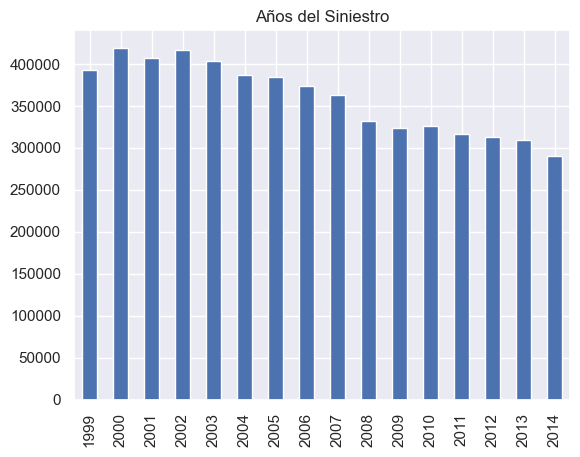

In [16]:
plot = df['C_YEAR'].value_counts(sort=False).plot(kind='bar',
                                        title='Años del Siniestro')

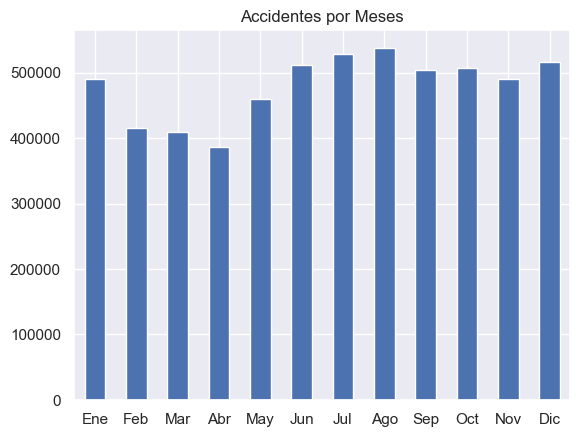

In [17]:
plot = df['C_MNTH'].value_counts(sort=False).plot(kind='bar',
                                        title='Accidentes por Meses')

meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep',
         'Oct', 'Nov', 'Dic']
plot.set_xticklabels(meses, rotation=0)
plt.show()

Los meses los vamos a agrupar por trimestres.

In [18]:
df['C_MNTH'] = (df['C_MNTH']-1)//3 + 1
df = df.rename({'C_MNTH': 'C_QRT'}, axis= 1)

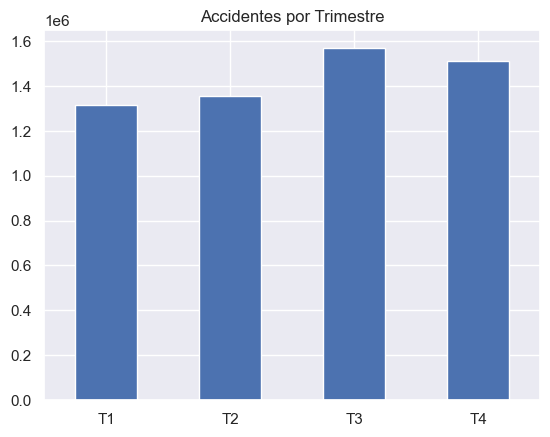

In [19]:
plot = df['C_QRT'].value_counts(sort=False).plot(kind='bar',
                                  title='Accidentes por Trimestre')

trimestres = ['T1', 'T2', 'T3', 'T4']
plot.set_xticklabels(trimestres, rotation=0)
plt.show()

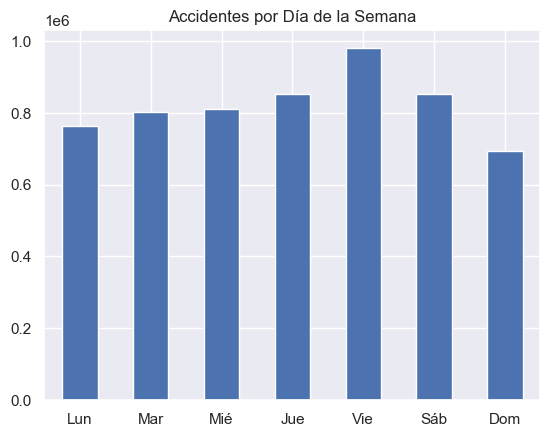

In [20]:
plot = df['C_WDAY'].value_counts(sort=False).plot(kind='bar',
                            title='Accidentes por Día de la Semana')

dias_semana = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
plot.set_xticklabels(dias_semana, rotation=0)
plt.show()


Los días de la semana los vamos a agrupar en dos grupos, finde de semana y entre semana.

In [21]:
df['C_WDAY'] = df['C_WDAY'].replace({1:1, 2:1, 3:1, 4:1, 5:2, 6:2, 7:2})

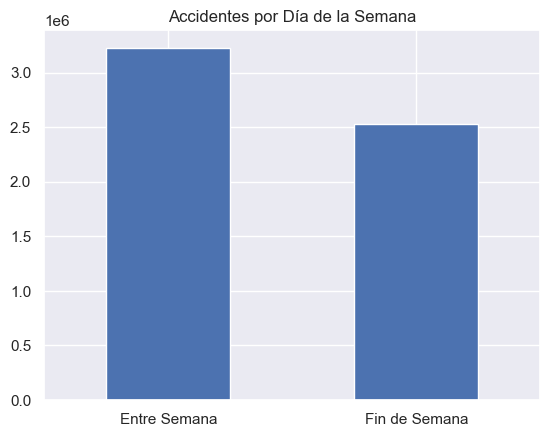

In [22]:
plot = df['C_WDAY'].value_counts(sort=False).plot(kind='bar',
                        title='Accidentes por Día de la Semana')

plot.set_xticklabels(['Entre Semana', 'Fin de Semana'], rotation=0)
plt.show()

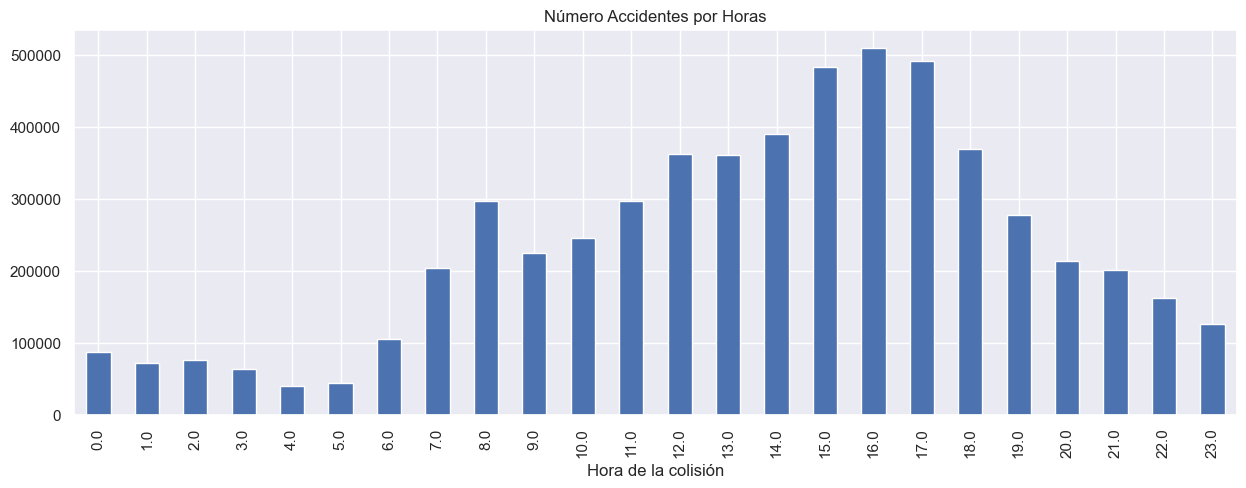

In [23]:
plt.figure(figsize=(15,5))
pd.concat([df], axis=1).groupby(('C_HOUR'))['C_SEV'].count().plot(kind="bar")

plt.xlabel('Hora de la colisión')
plt.title('Número Accidentes por Horas')
plt.show()

Las horas las vamos a agrupar por tramos de 6 horas.

In [24]:
df['C_HOUR'] = df['C_HOUR'].replace({0:1, 1:1, 2:1, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:2, 10:2, 11:2, 12:3, 13:3, 14:3, 15:3, 16:3, 17:3, 18:4, 19:4, 20:4, 21:4, 22:4, 23:4})

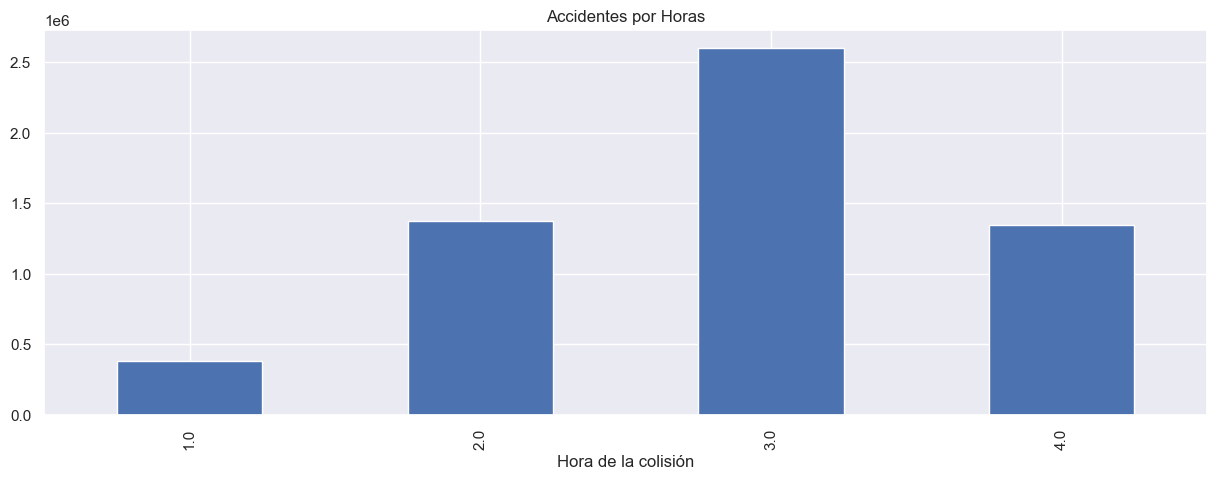

In [25]:
plt.figure(figsize=(15,5))
pd.concat([df], axis=1).groupby(('C_HOUR'))['C_SEV'].count().plot(kind="bar")

plt.xlabel('Hora de la colisión')
plt.title('Accidentes por Horas')
plt.show()

Donde: 
- 1.0 es 00:00 - 5:59
- 2.0 es 6:00 - 11:59
- 3.0 es 12:00 - 17:59
- 4.0 es 18:00 - 23:59

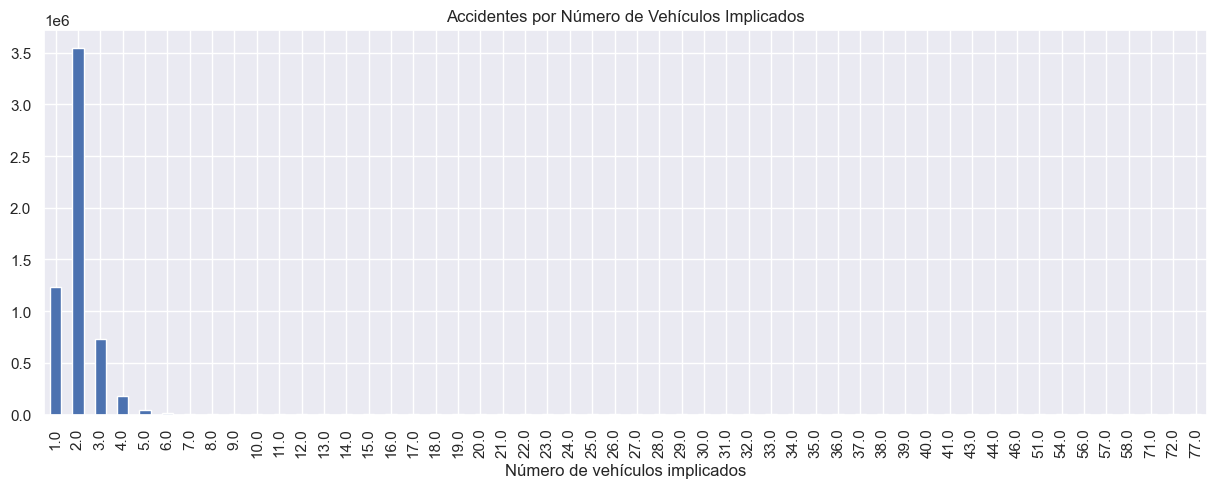

In [26]:
plt.figure(figsize=(15,5))
pd.concat([df], axis=1).groupby(('C_VEHS'))['C_SEV'].count().plot(kind="bar")

plt.xlabel('Número de vehículos implicados')
plt.title('Accidentes por Número de Vehículos Implicados')
plt.show()

Como vemos hay muchos tipos de colisiones, es por ello que todas en las que intervengan 6 o más vehiculos las clasificaremos como 6.

In [27]:
df.loc[df['C_VEHS'] >=6 , 'C_VEHS'] = 6

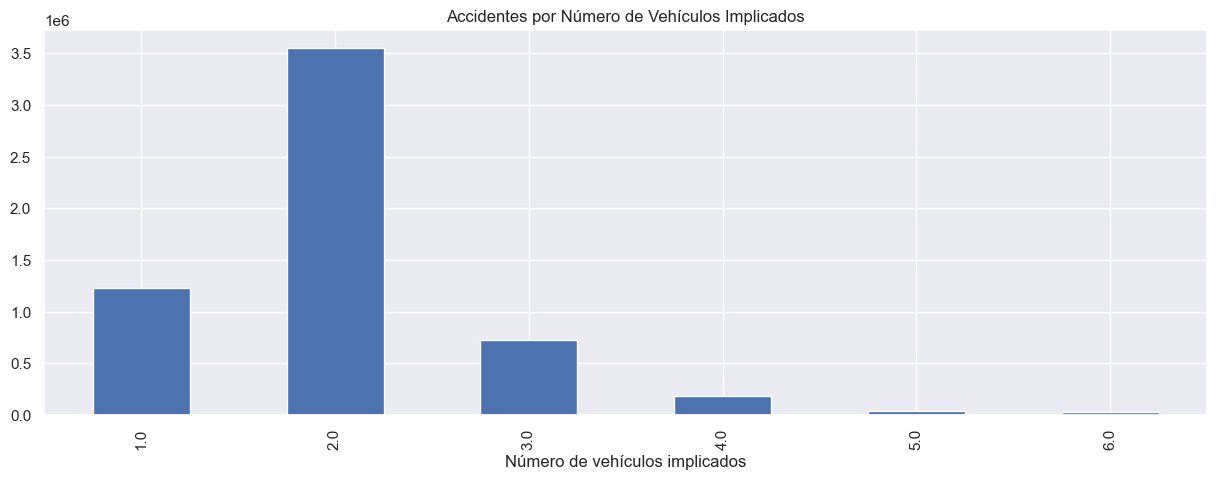

In [28]:
plt.figure(figsize=(15,5))
pd.concat([df], axis=1).groupby(('C_VEHS'))['C_SEV'].count().plot(kind="bar")

plt.xlabel('Número de vehículos implicados')
plt.title('Accidentes por Número de Vehículos Implicados')
plt.show()

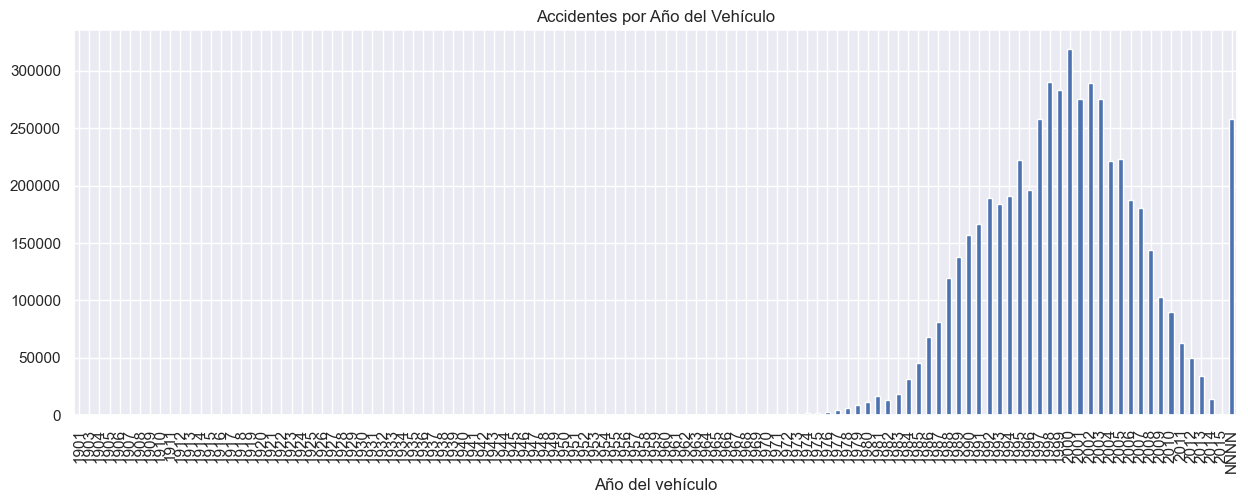

In [29]:
plt.figure(figsize=(15,5))
pd.concat([df], axis=1).groupby(('V_YEAR'))['C_SEV'].count().plot(kind="bar")

plt.xlabel('Año del vehículo')
plt.title('Accidentes por Año del Vehículo')
plt.show()

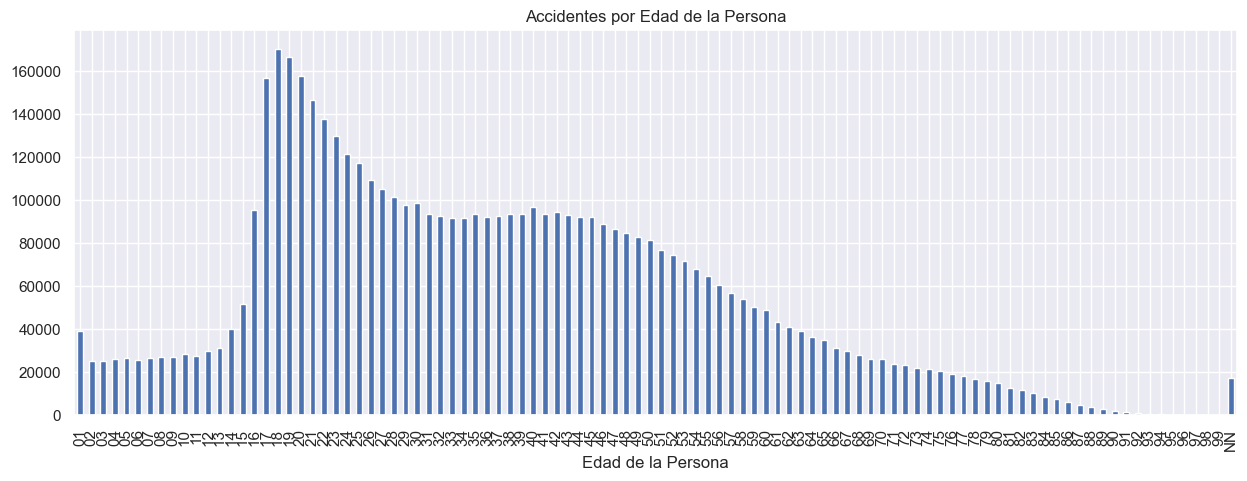

In [30]:
plt.figure(figsize=(15,5))
pd.concat([df], axis=1).groupby(('P_AGE'))['C_SEV'].count().plot(kind="bar")

plt.xlabel('Edad de la Persona')
plt.title('Accidentes por Edad de la Persona')
plt.show()

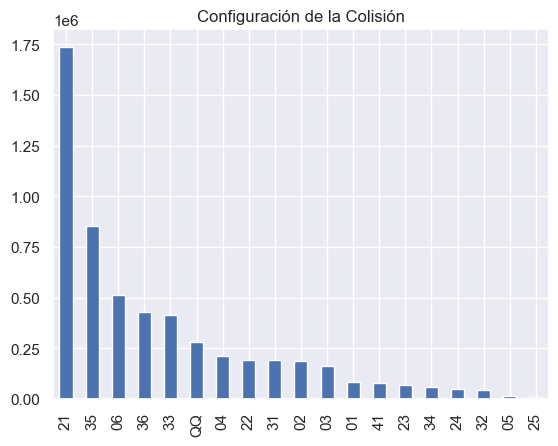

In [31]:
plot = df['C_CONF'].value_counts().plot(kind='bar',
                                title='Configuración de la Colisión')

Vamos a agrupar los casos: 
- Un vehículo a objeto móvil (01)
- Un vehículo a objeto quieto (02)
- Un vehículo otros casos (03)
- Dos vehículos misma dirrección (21)
- Dos vehculos distinta dirección (31)
- Choque con un vehiculo aparcado (41)
- Otros casos (QQ)

In [32]:
df['C_CONF'] = df['C_CONF'].replace({'04':'03','05':'03','06':'03','22':'21','23':'21','24':'21','25':'21','32':'31','33':'31','34':'31','35':'31','36':'31'})

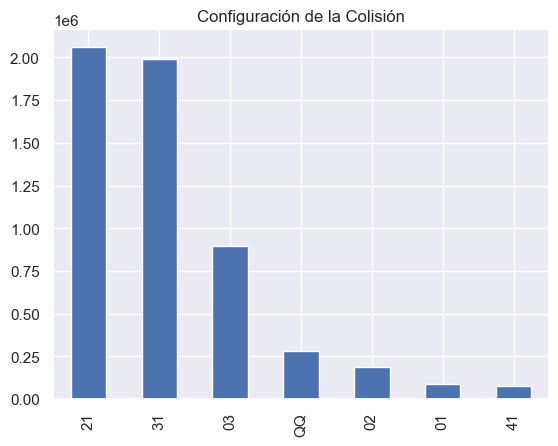

In [33]:
plot = df['C_CONF'].value_counts().plot(kind='bar',
                             title='Configuración de la Colisión')

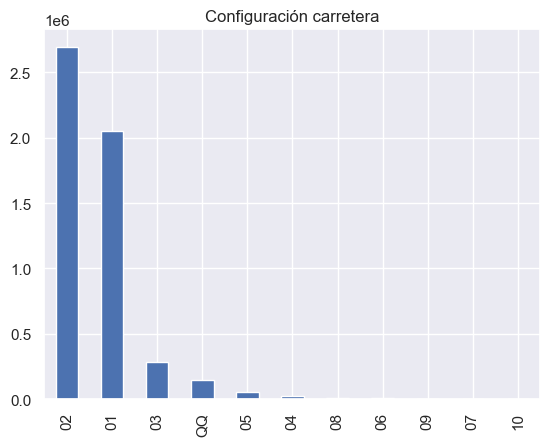

In [34]:
plot = df['C_RCFG'].value_counts().plot(kind='bar',
                                      title='Configuración carretera')

Agrupamos el lugar del accidente por semejanzas.

Vamos a agrupar los casos: 
- No intersección(01)
- Algun tipo de intersección (02)
- Pasos ade nivel (04)
- Otros casos (QQ)

In [35]:
df['C_RCFG'] = df['C_RCFG'].replace({'03':'02','05':'04','06':'04','07':'01','08':'01','09':'02','10':'02'})

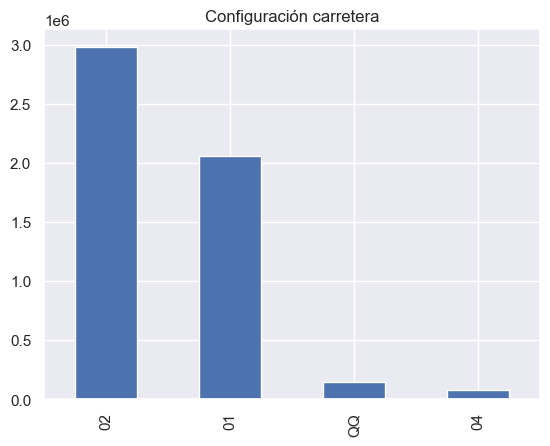

In [36]:
plot = df['C_RCFG'].value_counts().plot(kind='bar',
                                    title='Configuración carretera')

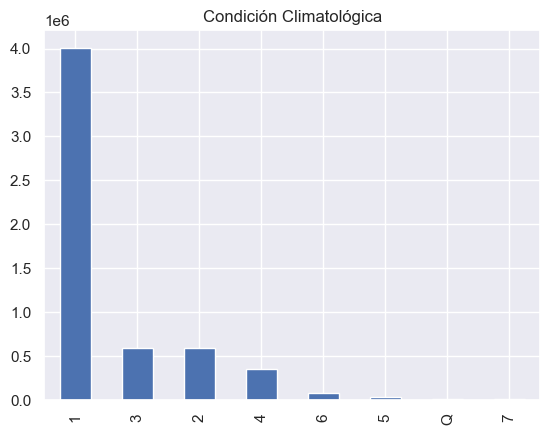

In [37]:
plot = df['C_WTHR'].value_counts().plot(kind='bar',
                                     title='Condición Climatológica')

Agrupamos por condiciones 'normales' o hay alguna climatología adversa que las voy a dividir en si influye en el control del coche o en la visibilidad.
- Condiciones 'normales' (1)
- Alguna climatología adversa (3)
- Influye en el control del coche o visibilidad (6)
- Otros (Q)

In [38]:
df['C_WTHR'] = df['C_WTHR'].replace({'2':'1','4':'3','5':'3','7':'3'})

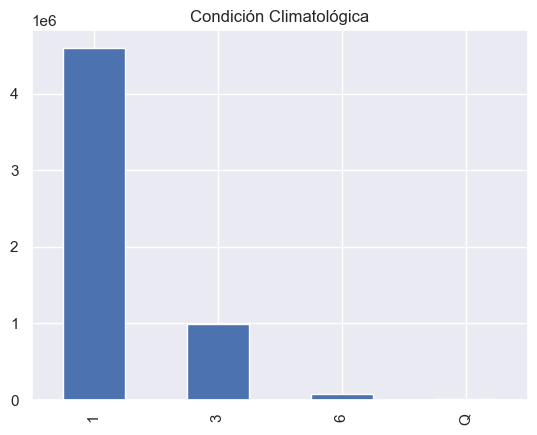

In [39]:
plot = df['C_WTHR'].value_counts().plot(kind='bar',
                                     title='Condición Climatológica')

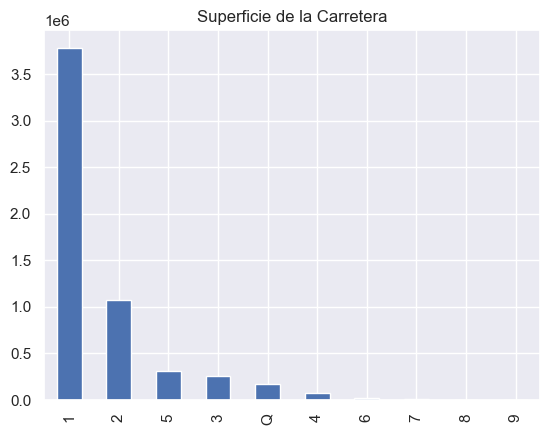

In [40]:
plot = df['C_RSUR'].value_counts().plot(kind='bar',
                                title='Superficie de la Carretera')

Dividimos en:
- Superficie normal (1)
- Superficie mojada (2)
- Superficie nevada (3)
- Otros (Q)

In [41]:
df['C_RSUR'] = df['C_RSUR'].replace({'4':'3','5':'3','6':'Q','7':'Q','8':'Q','9':'Q'})

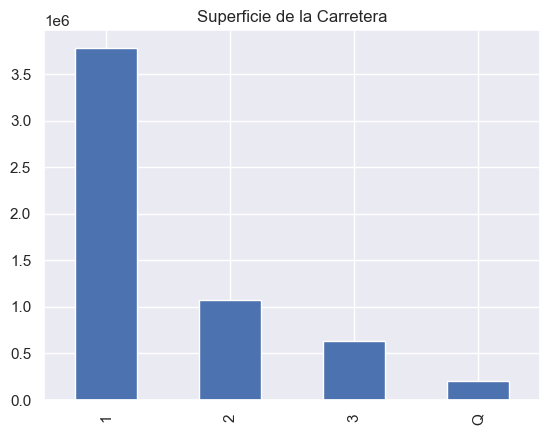

In [42]:
plot = df['C_RSUR'].value_counts().plot(kind='bar',
                                    title='Superficie de la Carretera')


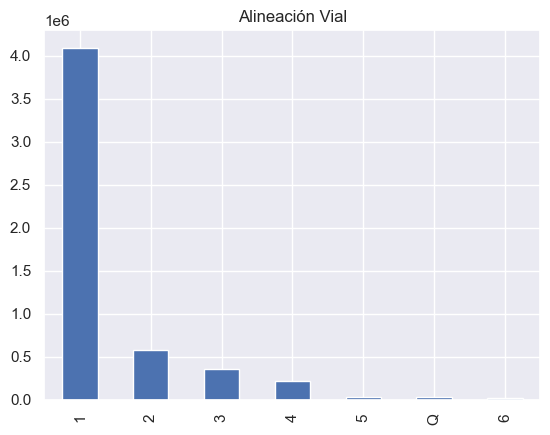

In [43]:
plot = df['C_RALN'].value_counts().plot(kind='bar',
                                    title='Alineación Vial')

Dividimos en:
- Recto (1)
- Curva (3)
- Otros (Q)

In [44]:
df['C_RALN'] = df['C_RALN'].replace({'2':'1','4':'3','5':'Q','6':'Q'})

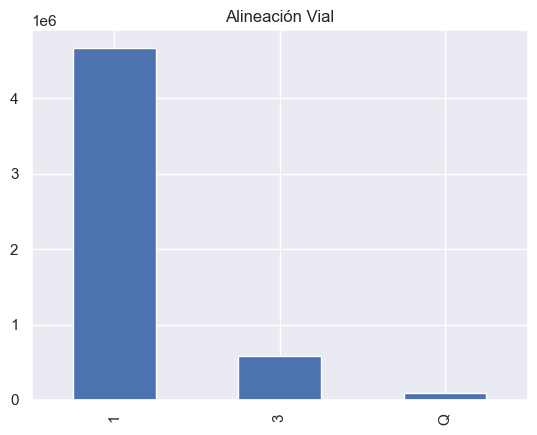

In [45]:
plot = df['C_RALN'].value_counts().plot(kind='bar',
                                    title='Alineación Vial')

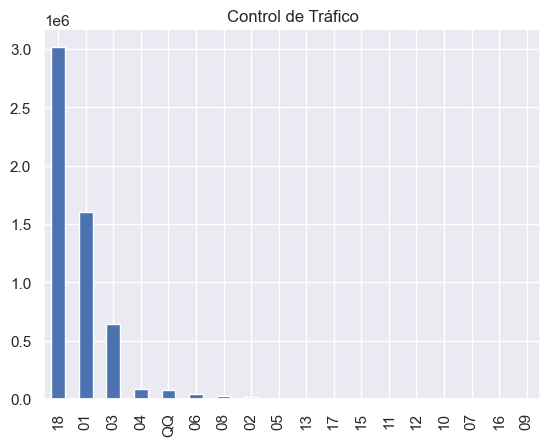

In [46]:
plot = df['C_TRAF'].value_counts().plot(kind='bar',
                                     title='Control de Tráfico')

Las vamos a agrupar por semejanza y luego un grupo con las demás.
- Señales de tráfico en funcionamiento (01)
- Señales de peligro (03)
- Paseo peatones, cruce escolar, ... (06)
- No Control (18)
- Otros (QQ)

In [47]:
df['C_TRAF'] = df['C_TRAF'].replace({'02':'01','04':'03','05':'03','08':'06','09':'06','07':'QQ','10':'06','11':'QQ','12':'QQ','13':'QQ','14':'QQ','15':'QQ','16':'QQ','17':'QQ'})

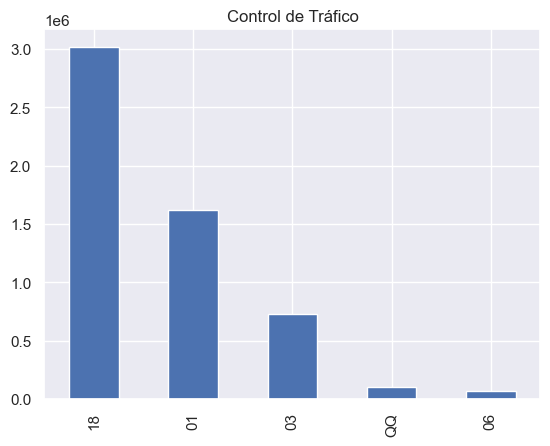

In [48]:
plot = df['C_TRAF'].value_counts().plot(kind='bar',
                                     title='Control de Tráfico')

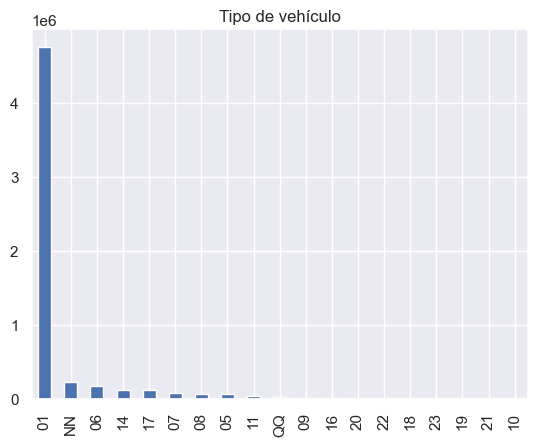

In [49]:
plot = df['V_TYPE'].value_counts().plot(kind='bar',
                                            title='Tipo de vehículo')

Vamos a dividir en:
- Turismos (01)
- Furgonetas (05)
- Camiones y vehiculos pesados (07)
- Bicicletas y motos(y cosas como patinetes) (14)
- Vehículo para Peatones (NN)
- Otros (QQ)

In [50]:
df['V_TYPE'] = df['V_TYPE'].replace({'06':'05','08':'07','09':'07','10':'07','11':'07','16':'14','17':'14','18':'05','19':'07','20':'07','21':'07','22':'QQ','23':'05'})

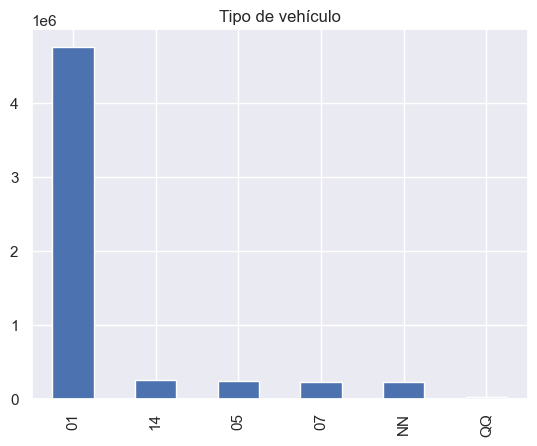

In [51]:
plot = df['V_TYPE'].value_counts().plot(kind='bar',
                                            title='Tipo de vehículo')

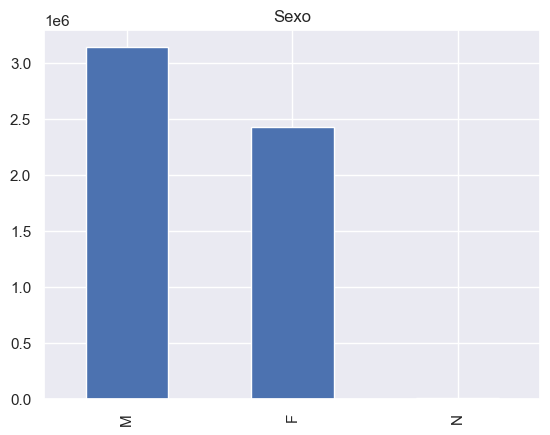

In [52]:
plot = df['P_SEX'].value_counts().plot(kind='bar',
                                            title='Sexo')

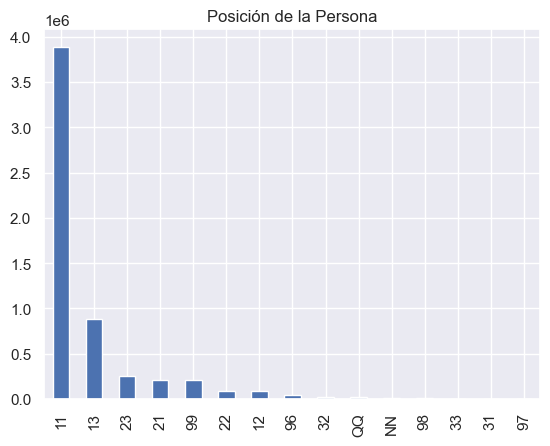

In [53]:
plot = df['P_PSN'].value_counts().plot(kind='bar',
                                  title='Posición de la Persona')

Antes de recodificar vamos a mirar datos concretos de los conductores.

In [54]:
conductores=df[df['P_PSN']=='11']

In [55]:
conductores.P_SEX.value_counts()

M    2332976
F    1405000
N       1641
Name: P_SEX, dtype: int64

In [56]:
conductores.P_AGE.value_counts()

19    105418
18    104274
20    102267
21     98397
22     93996
       ...  
03        72
96        67
02        65
98        38
97        26
Name: P_AGE, Length: 100, dtype: int64

In [57]:
conductores.P_USER.value_counts()

1.0    3623449
4.0     106216
5.0      93988
3.0        758
Name: P_USER, dtype: int64

Vamos a separar en:
- Primera fila (11)
- Otro sitio (QQ)
- Peatón (99)
- No aplicable (NN)

In [58]:
df['P_PSN'] = df['P_PSN'].replace({'12':'11','13':'11','21':'QQ','22':'QQ','23':'QQ','31':'QQ','32':'QQ','33':'QQ','96':'QQ','97':'QQ','98':'QQ'})

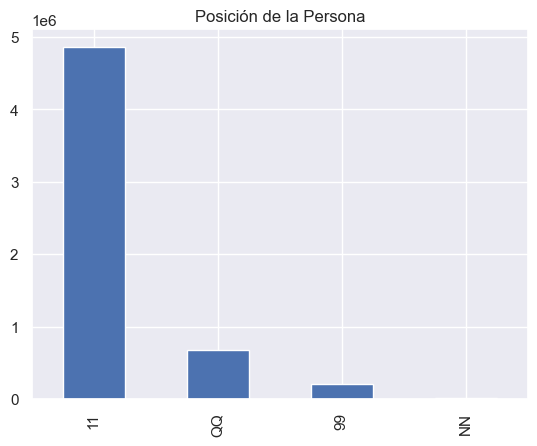

In [59]:
plot = df['P_PSN'].value_counts().plot(kind='bar',
                                    title='Posición de la Persona')

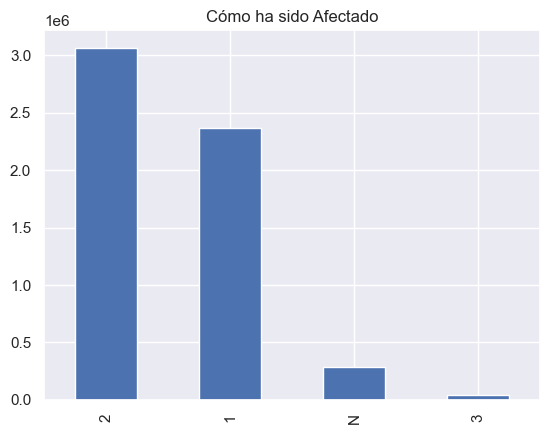

In [60]:
plot = df['P_ISEV'].value_counts().plot(kind='bar',
                                    title='Cómo ha sido Afectado')

Donde:
- Sin Lesiones (1)
- Con Lesiones (2)
- Muerte inmediata o dentro del tiempo límite (3)
- No aplicable (N)

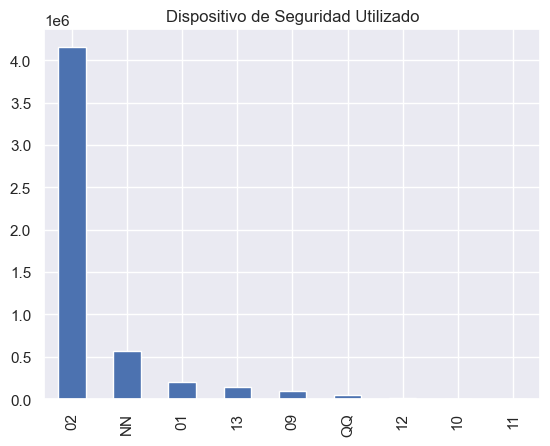

In [61]:
plot = df['P_SAFE'].value_counts().plot(kind='bar',
                         title='Dispositivo de Seguridad Utilizado')

Vamos a recalificar como:
- No usa (01)
- Usar todos (02)
- No usa porque no tiene (13)
- Otro caso (QQ)
- No procede (NN)

In [62]:
df['P_SAFE'] = df['P_SAFE'].replace({'09':'02','10':'QQ','11':'02','12':'QQ'})

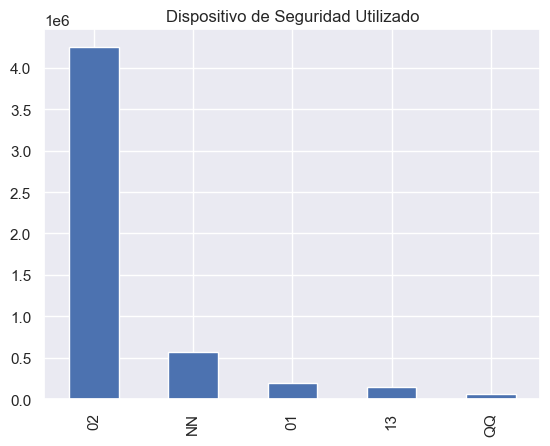

In [63]:
plot = df['P_SAFE'].value_counts().plot(kind='bar',
                                title='Dispositivo de Seguridad Utilizado')

In [64]:
df['P_USER']=df['P_USER'].astype('object')

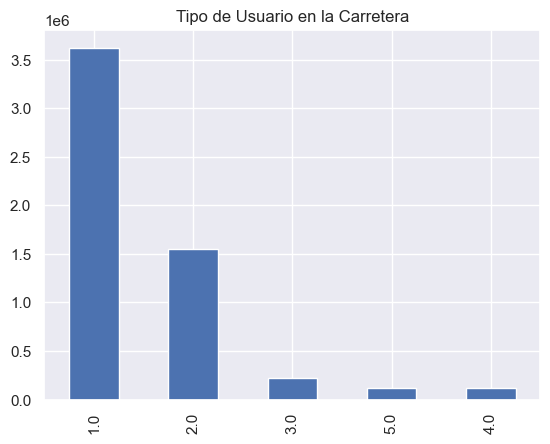

In [65]:
plot = df['P_USER'].value_counts().plot(kind='bar',
                            title='Tipo de Usuario en la Carretera')

Vamos a agrupar en:
- Vehículo Motor (1)
- Motos y bicis (4)
- Peatón (3)

In [66]:
df['P_USER'] = df['P_USER'].replace({2:1,5:4})

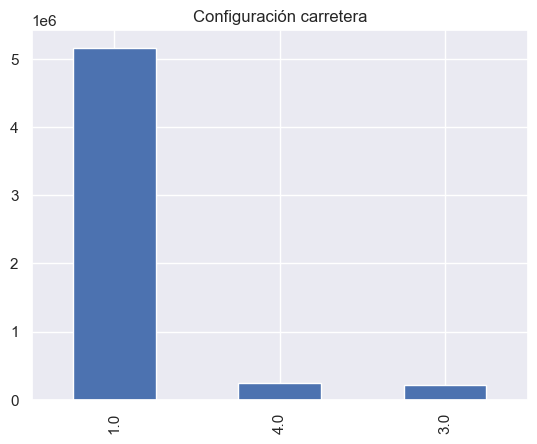

In [67]:
plot = df['P_USER'].value_counts().plot(kind='bar',
                                            title='Configuración carretera')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5758005 entries, 0 to 5860404
Data columns (total 20 columns):
 #   Column  Dtype  
---  ------  -----  
 0   C_YEAR  int64  
 1   C_QRT   float64
 2   C_WDAY  float64
 3   C_HOUR  float64
 4   C_SEV   int64  
 5   C_VEHS  float64
 6   C_CONF  object 
 7   C_RCFG  object 
 8   C_WTHR  object 
 9   C_RSUR  object 
 10  C_RALN  object 
 11  C_TRAF  object 
 12  V_TYPE  object 
 13  V_YEAR  object 
 14  P_SEX   object 
 15  P_AGE   object 
 16  P_PSN   object 
 17  P_ISEV  object 
 18  P_SAFE  object 
 19  P_USER  float64
dtypes: float64(5), int64(2), object(13)
memory usage: 922.5+ MB


* **VALORES NULOS**

Vamos a contar los nulos por filas, porque aquellos registros que superen cierta cantidad de nulos no nos sirven, porque no podremos imputar sobre ellos.

In [69]:
filasnul = df.isnull().sum(axis=1).sort_values(ascending=False)
FNULOS = pd.DataFrame(filasnul, columns=['nulos_filas'])  
FNULOS['obj'] = df['C_SEV'].copy()
FNULOS['porcentaje_filas']= FNULOS['nulos_filas']/df.shape[1]
FNULOS

,nulos_filas,obj,porcentaje_filas
5245711,16,1,0.80
769190,13,0,0.65
2884064,13,0,0.65
942366,12,0,0.60
2754672,12,0,0.60
...,...,...,...
2623113,0,0,0.00
2623114,0,0,0.00
2623115,0,0,0.00
2623116,0,0,0.00


Vamos a eliminar los registros que tengan más de un 30% de nulos.

In [70]:
print(df.shape)
nul30 = list(FNULOS.index[FNULOS.porcentaje_filas>=0.30])
df = df.loc[set(df.index)-set(nul30)].reset_index()
df=df.drop(['index'], axis=1)
print(df.shape)

(5758005, 20)
(5742602, 20)


In [71]:
df.isnull().any(axis=1).sum()

1681824

De todos los registros que tenemos en este momento, todos estos tienen algún valor faltante.

In [72]:
df.isnull().any(axis=1).sum()/len(df)

0.292867936869036

* **VALORES DUPLICADOS**

Como he recodificado, puede que alguno de mis entradas se haya duplicado, por lo que eliminamos los duplicados nuevos.

In [73]:
print(df.shape)
df=df.drop_duplicates()
print(df.shape)

(5742602, 20)
(5556590, 20)


* **MATRIZ DE CORRELACIONES**

<AxesSubplot:>

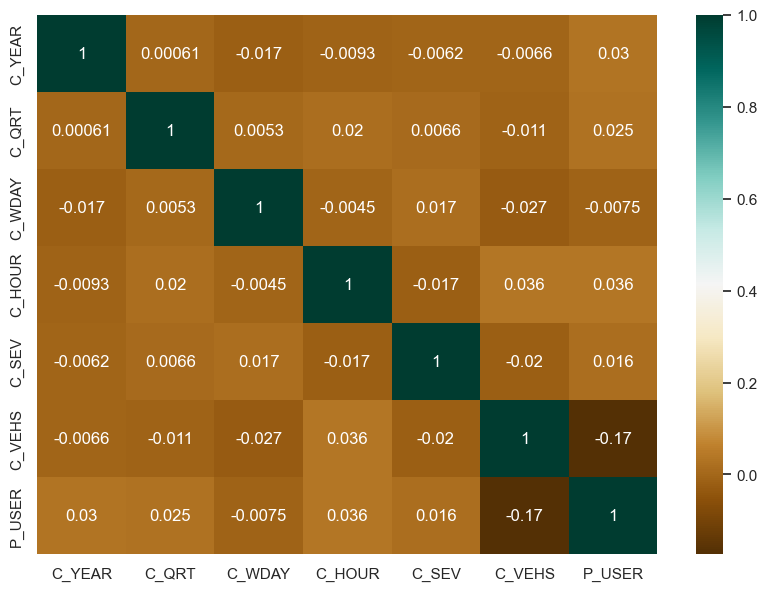

In [74]:
correlaciones = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlaciones,cmap="BrBG", annot = True)

No hay correlaciones entre las variables numéricas, veamos entre las categóricas con la matriz de Cramer.

In [75]:
def cramers_corrected_stat(x,y):
    result=-1
    if len(x.value_counts())==1 :
        print("First variable is constant")
    elif len(y.value_counts())==1:
        print("Second variable is constant")
    else:
        conf_matrix=pd.crosstab(x, y)

        if conf_matrix.shape[0]==2:
            correct=False
        else:
            correct=True

        chi2 = ss.chi2_contingency(conf_matrix, correction=correct)[0]

        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    return round(result,6)

In [76]:
categoricas = list(df.select_dtypes(include=['object'], exclude=np.number).columns)
numericas = list(df.select_dtypes(exclude=['object'], include=np.number).columns)
print(categoricas, numericas)

['C_CONF', 'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_TYPE', 'V_YEAR', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE'] ['C_YEAR', 'C_QRT', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'P_USER']


In [77]:
categoricas.remove('V_YEAR')
categoricas.remove('P_AGE')

In [78]:
rows= []
for var1 in categoricas:
  col = []
  for var2 in categoricas :

    cramers =cramers_corrected_stat(df[var1], df[var2]) # Test V de Cramer
    col.append(round(cramers,2)) 
  rows.append(col)
  
cramers_results = np.array(rows)
cramer_matrix = pd.DataFrame(cramers_results, columns = categoricas, index = categoricas)
cramer_matrix

,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_PSN,P_ISEV,P_SAFE
C_CONF,1.00,0.25,0.04,0.09,0.17,0.19,0.16,0.11,0.21,0.15,0.18
C_RCFG,0.25,1.00,0.04,0.09,0.14,0.37,0.05,0.03,0.04,0.07,0.06
C_WTHR,0.04,0.04,1.00,0.39,0.04,0.04,0.04,0.01,0.01,0.02,0.02
C_RSUR,0.09,0.09,0.39,1.00,0.09,0.09,0.07,0.02,0.03,0.04,0.04
C_RALN,0.17,0.14,0.04,0.09,1.00,0.14,0.05,0.02,0.03,0.08,0.05
C_TRAF,0.19,0.37,0.04,0.09,0.14,1.00,0.05,0.04,0.04,0.06,0.04
V_TYPE,0.16,0.05,0.04,0.07,0.05,0.05,1.00,0.12,0.56,0.14,0.27
P_SEX,0.11,0.03,0.01,0.02,0.02,0.04,0.12,1.00,0.65,0.19,0.13
P_PSN,0.21,0.04,0.01,0.03,0.03,0.04,0.56,0.65,1.00,0.15,0.29
P_ISEV,0.15,0.07,0.02,0.04,0.08,0.06,0.14,0.19,0.15,1.00,0.39


Para interpretar la V de Cramer vamos a tomar como que a apartir de 0,3 las variables estan correladas. Vamos eliminar variables siguiendo este criterio y dejandonos llevar por el sentido común.

In [79]:
df = df.drop(['C_TRAF','C_RSUR','P_PSN','P_USER','P_SAFE'], axis=1)
df.shape

(5556590, 15)

* **VALORES NULOS**

Tras eliminar estas variables vamos a volver a mirar el porcentaje de datos faltantes que tenemos.

In [80]:
df.isnull().any(axis=1).sum()/len(df)

0.2068858778495444

In [81]:
df.isnull().sum()/len(df)

C_YEAR    0.000000
C_QRT     0.000029
C_WDAY    0.000186
C_HOUR    0.010177
C_SEV     0.000000
C_VEHS    0.000000
C_CONF    0.029643
C_RCFG    0.086165
C_WTHR    0.012817
C_RALN    0.072505
V_TYPE    0.003273
V_YEAR    0.048533
P_SEX     0.026034
P_AGE     0.047237
P_ISEV    0.000000
dtype: float64

Como vemos la cantidad de datos faltantes por variable y en general no es muy alto, y debido a la gran cantidad de datos de la que disponemos vamos a elegir eliminar los valores nulos de nuestros registros.

In [82]:
print(df.shape)
df=df.dropna()
print(df.shape)

(5556590, 15)
(4407010, 15)


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4407010 entries, 5 to 5742597
Data columns (total 15 columns):
 #   Column  Dtype  
---  ------  -----  
 0   C_YEAR  int64  
 1   C_QRT   float64
 2   C_WDAY  float64
 3   C_HOUR  float64
 4   C_SEV   int64  
 5   C_VEHS  float64
 6   C_CONF  object 
 7   C_RCFG  object 
 8   C_WTHR  object 
 9   C_RALN  object 
 10  V_TYPE  object 
 11  V_YEAR  object 
 12  P_SEX   object 
 13  P_AGE   object 
 14  P_ISEV  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 538.0+ MB


Vamos a pasar las variables 'V_YEAR' y 'P_AGE' a tipo numérico, para ello los valores codificados como 'NNNN' y 'NN' los vamos a convertir en la mediana , ya que la variable 'V_TYPE' nos dará la información de si ese valor procede o no.

Para ello lo vamos a pasar a numérico haciendo los valores NaN con coerce y luego los vamos a imputar por la mediana, ademas vamos a cambiar la variable 'V_YEAR' a 'V_AGE' que nos va a medir la edad del vehículo el día del accidente. 

In [84]:
df['P_AGE'] = pd.to_numeric(df['P_AGE'],"coerce")

In [85]:
df['P_AGE'].fillna(df['P_AGE'].median(), inplace=True)

In [86]:
df['V_YEAR'] = pd.to_numeric(df['C_YEAR'] - pd.to_numeric(df['V_YEAR'], errors= "coerce"))
df = df.rename(columns={'V_YEAR': 'V_AGE'})

In [87]:
df['V_AGE'].fillna(df['V_AGE'].median(), inplace=True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4407010 entries, 5 to 5742597
Data columns (total 15 columns):
 #   Column  Dtype  
---  ------  -----  
 0   C_YEAR  int64  
 1   C_QRT   float64
 2   C_WDAY  float64
 3   C_HOUR  float64
 4   C_SEV   int64  
 5   C_VEHS  float64
 6   C_CONF  object 
 7   C_RCFG  object 
 8   C_WTHR  object 
 9   C_RALN  object 
 10  V_TYPE  object 
 11  V_AGE   float64
 12  P_SEX   object 
 13  P_AGE   float64
 14  P_ISEV  object 
dtypes: float64(6), int64(2), object(7)
memory usage: 538.0+ MB


In [89]:
df.isnull().any(axis=1).sum()

0

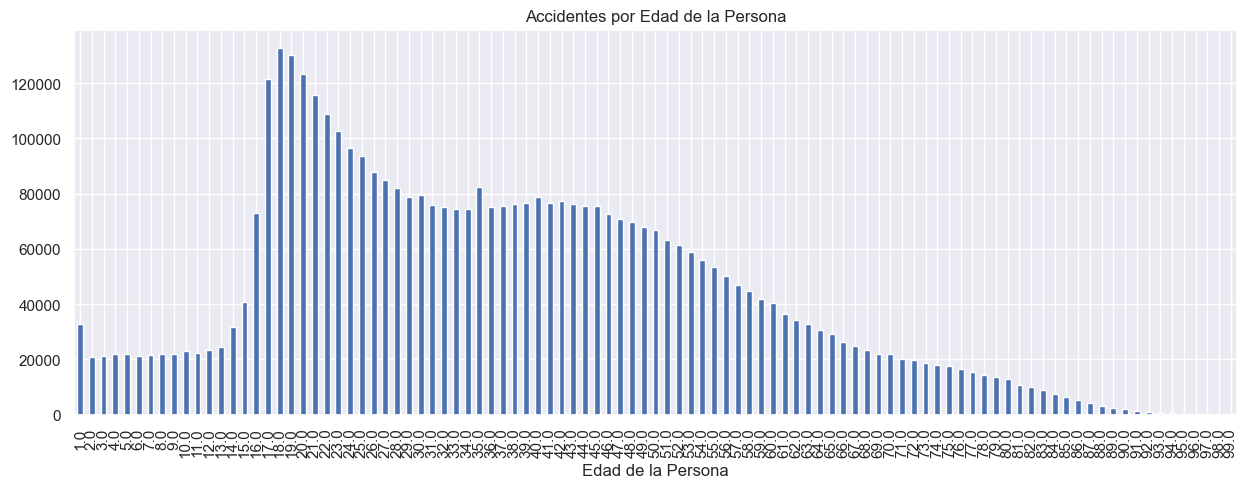

In [90]:
plt.figure(figsize=(15,5))
pd.concat([df], axis=1).groupby(('P_AGE'))['C_SEV'].count().plot(kind="bar")

plt.xlabel('Edad de la Persona')
plt.title('Accidentes por Edad de la Persona')
plt.show()

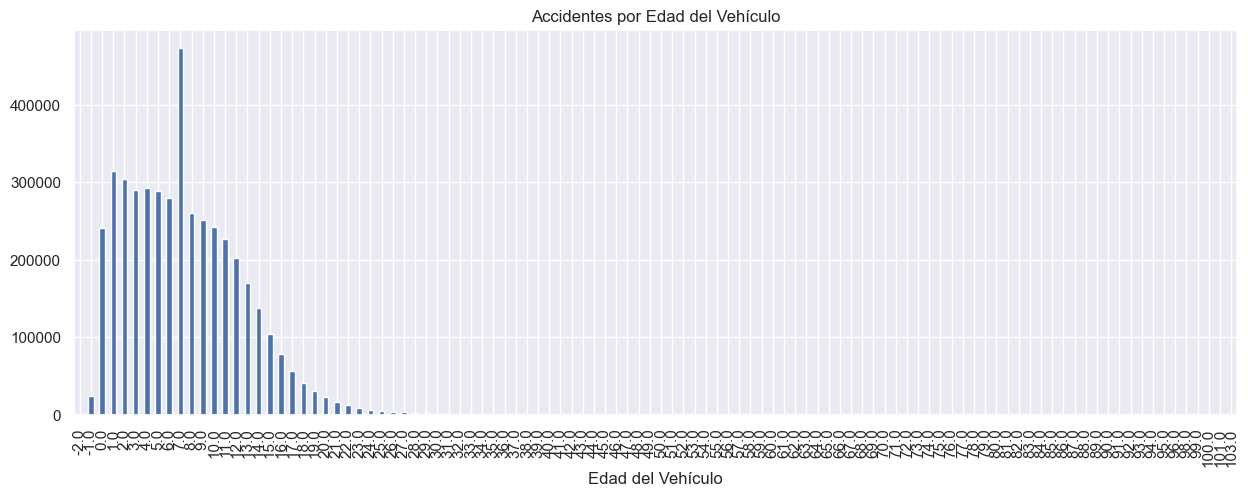

In [91]:
plt.figure(figsize=(15,5))
pd.concat([df], axis=1).groupby(('V_AGE'))['C_SEV'].count().plot(kind="bar")

plt.xlabel('Edad del Vehículo')
plt.title('Accidentes por Edad del Vehículo')
plt.show()

In [92]:
df['C_QRT'] = df['C_QRT'].astype('object')
df['C_WDAY'] = df['C_WDAY'].astype('object')
df['C_HOUR'] = df['C_HOUR'].astype('object')

Tras hacer este análisis y debido a que no tenemos registros de los vehículos que no tienen accidentes, podemos decir que:

Los coches más 'nuevos' son los que más accidentes sufren, y el tipo de vehículo que más accidentes sufre son los turismos, que son de los que más registros hay.

Respecto a los conductores, vemos que los que mas accidentes tienen son los jovenes entorno a 20 años, los hombres y conductores de turismos.

## **2. Preparación y División del Conjunto de Datos**

Ahora tenemos dos problemas:
- Detectar si va a ser necesario tratamiento
- Si la colisión ha resultado con una fatalidad

Por ello necesitamos 2 conjuntos de datos.

In [93]:
dfISEV=df.copy()
dfSEV=df.copy()

In [94]:
dfISEV = dfISEV.drop(['C_SEV'], axis=1)

In [95]:
dfSEV=dfSEV.drop(['P_ISEV'], axis=1)

### Modelo para detectar si habrá fallecidos

Empecemos por detectar el fallecimiento a nivel de colisión.

In [96]:
dfSEV['C_SEV'].value_counts()

0    4327528
1      79482
Name: C_SEV, dtype: int64

Como vemos tenemos una muestra bastante desbalanceada, por ello tendremos que balancearla, para ello como tenemos bastantes datos, lo haremos por método de under sampling.

In [97]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 0)
rus.fit_resample(dfSEV, dfSEV['C_SEV'])
print('Filas que nos quedamos:', len(rus.sample_indices_))

Filas que nos quedamos: 158964


<AxesSubplot:>

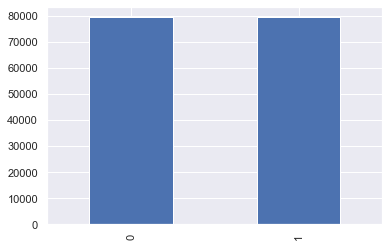

In [98]:
dfSEVunder= dfSEV.iloc[rus.sample_indices_]
dfSEVunder['C_SEV'].value_counts().plot.bar()

También vamos ha normalizar las variables numéricas y haremos un one hot encoding para las categóricas.

In [99]:
categoricas = list(dfSEVunder.select_dtypes(include=['object'], exclude=np.number).columns)
numericas = list(dfSEVunder.select_dtypes(exclude=['object'], include=np.number).columns)
print(categoricas, numericas)

['C_QRT', 'C_WDAY', 'C_HOUR', 'C_CONF', 'C_RCFG', 'C_WTHR', 'C_RALN', 'V_TYPE', 'P_SEX'] ['C_YEAR', 'C_SEV', 'C_VEHS', 'V_AGE', 'P_AGE']


In [100]:
numericas.remove('C_SEV')

In [101]:
from sklearn import metrics
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [102]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('nume', numeric_transformer, numericas),
        ('cat', onehot_transformer, categoricas)])

Separamos el conjunto de datos.

In [103]:
xtrain, xtest, ytrain, ytest = train_test_split(dfSEVunder.drop(columns=['C_SEV']), dfSEVunder['C_SEV'], test_size=0.25, random_state=0)

### **Evaluación Algoritomos de Clasificación**

#### Árbol de Decisión Simple

In [104]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Hacemos una primera prueba sin búsqueda de la mejor profundidad.

In [105]:
modelo11 = Pipeline(steps=[
    ('preprocesador', preprocessor),
    ('clasificador', DecisionTreeClassifier(random_state=2105))])

modelo11.fit(xtrain, ytrain)

ypred = modelo11.predict(xtest)
ypred_proba = modelo11.predict_proba(xtest)

score_modelo11 = modelo11.score(xtest, ytest)
score_train_modelo11 = modelo11.score(xtrain, ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo11)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo11)

Score en datos de test: 0.6622
Score en datos de entrenamiento: 0.9990


La diferencia entre la métrica en los datos de entrenamiento y de test es bastante elevada, lo que nos indica que hay sobreajuste. Vamos a elegir una profundidad máxima al azar para ver si se corrige.

In [106]:
modelo12 = Pipeline(steps=[
    ('preprocesador', preprocessor),
    ('clasificador', DecisionTreeClassifier(max_depth=7,random_state=2105))])

modelo12.fit(xtrain, ytrain)

ypred = modelo12.predict(xtest)
ypred_proba = modelo12.predict_proba(xtest)

score_modelo12 = modelo12.score(xtest, ytest)
score_train_modelo12 = modelo12.score(xtrain, ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo12)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo12)

Score en datos de test: 0.7037
Score en datos de entrenamiento: 0.7088


Vemos que efectivamente se corrige el overfitting, por ello vamos a hacer una búsqueda para comprobar cuál es la mejor profundidad máxima.

In [110]:
from sklearn.model_selection import GridSearchCV

In [108]:
modelo1 = Pipeline([
    ('preprocesador', preprocessor),
    ('clasificador', DecisionTreeClassifier(random_state=2105))])

parametros = {
    'clasificador__max_depth': np.array(range(4,15))}

grid_search = GridSearchCV(modelo1, parametros, cv=5)
grid_search.fit(xtrain, ytrain)

print("Mejor valor para max_depth encontrado:", grid_search.best_params_['clasificador__max_depth'])

Mejor valor para max_depth encontrado: 11


In [109]:
modelo1 = Pipeline([
    ('preprocesador', preprocessor),
    ('clasificador', DecisionTreeClassifier(max_depth=11, random_state=2105))])

modelo1.fit(xtrain, ytrain)

ypred = modelo1.predict(xtest)
ypred_proba = modelo1.predict_proba(xtest)

score_modelo1 = modelo1.score(xtest, ytest)
score_train_modelo1 = modelo1.score(xtrain, ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo1)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo1)

Score en datos de test: 0.7095
Score en datos de entrenamiento: 0.7347


Comprobamos que no hay sobreajuste.

Obtenemos el resto de métricas:

In [110]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71     19654
           1       0.72      0.70      0.71     20087

    accuracy                           0.71     39741
   macro avg       0.71      0.71      0.71     39741
weighted avg       0.71      0.71      0.71     39741



Calculamos la **matriz de confusión**.

<AxesSubplot:>

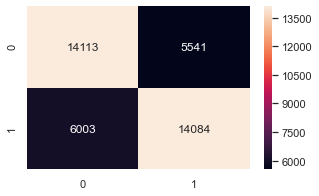

In [111]:
cf_matrix = metrics.confusion_matrix(ytest, ypred)
plt.figure(figsize=(5,3))
sns.heatmap(cf_matrix, annot=True, fmt = ".0f")

Ahora vemos la importancia que tiene cada varaible en el modelo.

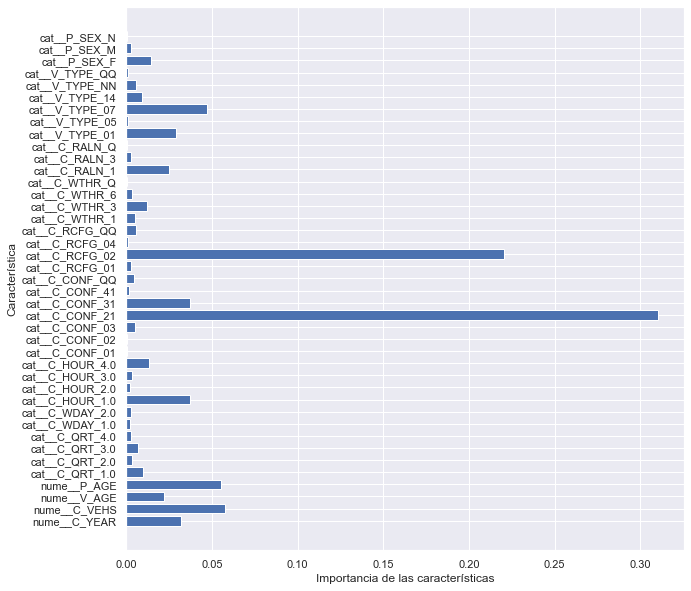

In [112]:
imp=modelo1.named_steps['clasificador'].feature_importances_
car=modelo1.named_steps['preprocesador'].get_feature_names_out()

plt.figure(figsize=(10,10))
plt.barh(np.arange(len(car)), imp)
plt.yticks(np.arange(len(car)),car)
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')
plt.show()

Como conclusión para este modelo podemos decir que los factores más importantes para predecir si en una colisión hay muertes son si ha sido en una intersección, si los coches iban en el mismo sentido, el número de vehículos implicados en la colisión y la edad de los pasajeros.

Ahora calculamos la curva ROC, se utiliza para evaluar y visualizar el rendimiento del modelo.

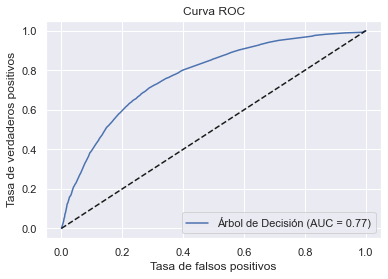

In [113]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener las probabilidades de las clases positivas
y_probs = modelo1.predict_proba(xtest)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(ytest, y_probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(ytest, y_probs)

# Trazar la curva ROC
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Línea base
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.show()

Podemos observar una capacidad de discriminación razonablemente buena, al haber obtenido un AUC de 0.77

#### Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

Hacemos una primera prueba sin búsqueda de la mejor profundidad.

In [115]:
modelo21 = Pipeline(steps=[
    ('preprocesador', preprocessor),
    ('clasificador', RandomForestClassifier(random_state=2105))])

modelo21.fit(xtrain, ytrain)

score_modelo21 = modelo21.score(xtest, ytest)
score_train_modelo21 = modelo21.score(xtrain, ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo21)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo21)

Score en datos de test: 0.7330
Score en datos de entrenamiento: 0.9990


En este también nos sale overfitting asi que vamos a hacer una búsqueda de profundidad.

In [116]:
modelo2 = Pipeline([
    ('preprocesador', preprocessor),
    ('clasificador', RandomForestClassifier(random_state=2105))])

parametros = {'clasificador__max_depth': [8,9,10,11,12]}

grid_search = GridSearchCV(modelo2, parametros, cv=5)
grid_search.fit(xtrain, ytrain)


print("Mejor valor para max_depth encontrado:", grid_search.best_params_['clasificador__max_depth'])

Mejor valor para max_depth encontrado: 12


A más profundidad mejor resultado, pero también mayor tiempo de computación y más sobreajuste, es por ello que vamos a comprobarlo con este modelo.

Obtenemos las métricas para el modelo con la mejor porfundidad obtenida.

In [117]:
modelo2 = Pipeline([
    ('preprocesador', preprocessor),
    ('clasificador', RandomForestClassifier(max_depth=12,random_state=2105))])

modelo2.fit(xtrain,ytrain)

ypred = modelo2.predict(xtest)
ypred_proba = modelo2.predict_proba(xtest)

score_modelo2 = modelo2.score(xtest, ytest)
score_train_modelo2 = modelo2.score(xtrain, ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo2)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo2)

Score en datos de test: 0.7220
Score en datos de entrenamiento: 0.7523


Comprobamos que no hay overfitting.

Obtenemos el resto de métricas:

In [118]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72     19654
           1       0.72      0.73      0.73     20087

    accuracy                           0.72     39741
   macro avg       0.72      0.72      0.72     39741
weighted avg       0.72      0.72      0.72     39741



Calculamos la **matriz de confusión**.

<AxesSubplot:>

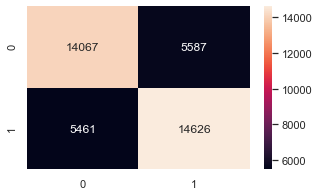

In [119]:
cf_matrix = metrics.confusion_matrix(ytest, ypred)
plt.figure(figsize=(5,3))
sns.heatmap(cf_matrix, annot=True, fmt = ".0f")

Ahora vemos la importancia de cada varaible en este modelo.

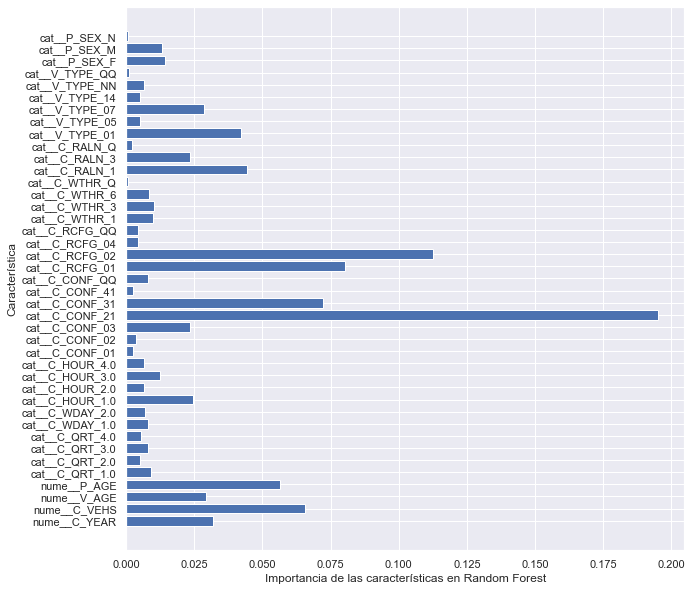

In [120]:
imp=modelo2.named_steps['clasificador'].feature_importances_
car=modelo2.named_steps['preprocesador'].get_feature_names_out()

plt.figure(figsize=(10,10))
plt.barh(np.arange(len(car)), imp)
plt.yticks(np.arange(len(car)),car)
plt.xlabel('Importancia de las características en Random Forest')
plt.ylabel('Característica')
plt.show()

Las mayoría de las variables de importancia son las mismas que las de el árbol simple, simplemente se añaden que los vehículos vayan en direcciones opuestas y que el lugar de la colisión sea una interseccion o una carretera recta o rampa

Ahora calculamos la curva ROC

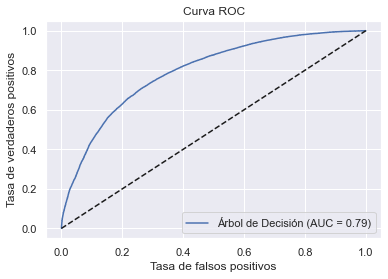

In [121]:
# Obtener las probabilidades de las clases positivas
y_probs = modelo2.predict_proba(xtest)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(ytest, y_probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(ytest, y_probs)

# Trazar la curva ROC
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Línea base
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.show()

El área bajo la curva ROC mejora levemente con respecto al anterior modelo.

#### Regresión logística

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
modelo3 = Pipeline(steps=[
    ('preprocesador', preprocessor),
    ('clasificador', LogisticRegression())])

modelo3.fit(xtrain, ytrain)

ypred = modelo3.predict(xtest)
ypred_proba = modelo3.predict_proba(xtest)

score_modelo3 = modelo3.score(xtest, ytest)
score_train_modelo3 = modelo3.score(xtrain, ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo3)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo3)

Score en datos de test: 0.7042
Score en datos de entrenamiento: 0.7055


Comprobamos que no hay sobreajuste.

Obtenemos el resto de métricas:

In [124]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70     19654
           1       0.71      0.71      0.71     20087

    accuracy                           0.70     39741
   macro avg       0.70      0.70      0.70     39741
weighted avg       0.70      0.70      0.70     39741



Calculamos la **matriz de confusión**.

<AxesSubplot:>

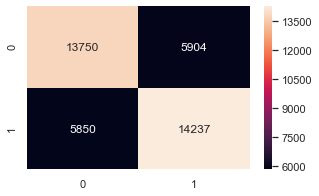

In [125]:
cf_matrix = metrics.confusion_matrix(ytest, ypred)
plt.figure(figsize=(5,3))
sns.heatmap(cf_matrix, annot=True, fmt = ".0f")

Ahora vemos la importancia que tiene cada varaible en este modelo. En regresión logística no podemos obtener directamente feature_importances_

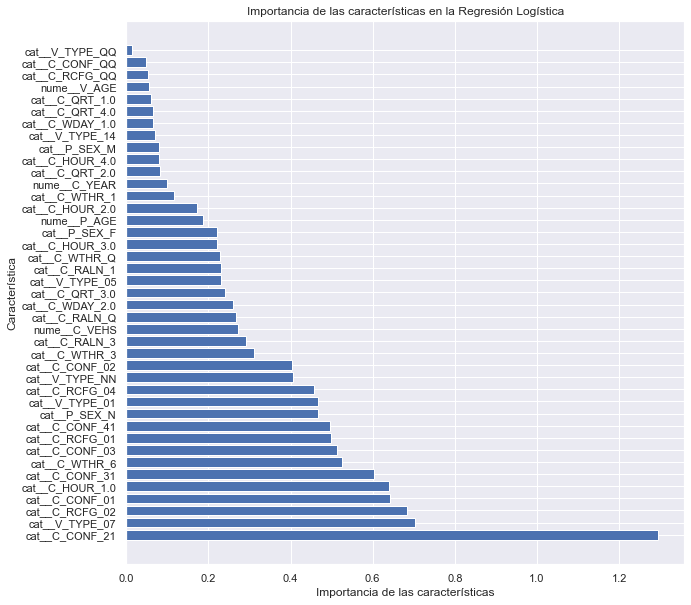

In [126]:
modelo3.named_steps['preprocesador'].get_feature_names_out()

logistic_regression = modelo3.named_steps['clasificador']
coeficientes = logistic_regression.coef_
nombres_caracteristicas = modelo3.named_steps['preprocesador'].get_feature_names_out()
importancias = list(zip(nombres_caracteristicas, abs(coeficientes[0])))
importancias_ordenadas = sorted(importancias, key=lambda x: x[1], reverse=True)

caracteristicas = [c[0] for c in importancias_ordenadas]
importancias = [c[1] for c in importancias_ordenadas]

plt.figure(figsize=(10,10))
plt.barh(range(len(caracteristicas)), importancias, align='center')
plt.yticks(range(len(caracteristicas)), caracteristicas)
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')
plt.title('Importancia de las características en la Regresión Logística')
plt.show()

Como vemos las variables más importantes a la hora que que haya una muerte en una colisión es que la colisión sea en la misma dirección, que sea un vehículo pesado, que ocurra en una intersección y si la colisión es con un objeto móvil (como puede ser un arrollamiento).

Ahora obtenemos la curva ROC

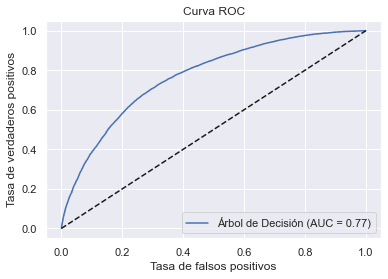

In [127]:
# Obtener las probabilidades de las clases positivas
y_probs = modelo3.predict_proba(xtest)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(ytest, y_probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(ytest, y_probs)

# Trazar la curva ROC
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Línea base
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.show()

Al igual que en el modelo del árbol de decisión, obtenemos un AUC razonablemente bueno.

#### XGBoost

In [128]:
from xgboost import XGBClassifier

Hacemos una primera prueba sin búsqueda de hiperparámetros.

In [129]:
clasificador = XGBClassifier(random_state=2105)

modelo41 = Pipeline(steps=[('preprocesador', preprocessor),
                          ('clasificador', clasificador)])

modelo41.fit(xtrain, ytrain)

ypred = modelo41.predict(xtest)
ypred_proba = modelo41.predict_proba(xtest)

score_modelo41 = modelo41.score(xtest, ytest)
score_train_modelo41 = modelo41.score(xtrain, ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo41)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo41)

Score en datos de test: 0.7248
Score en datos de entrenamiento: 0.7537


Vemos que no hay mucha diferencia entre en score obtenido mediante los datos de entrenamiento y mediante los datos de test. Por tanto no hay mucho overfitting.

Ahora, realizamos un búsqueda de hiperparámetros para ver si mejoramos el resultado.

In [130]:
clasificador = XGBClassifier(random_state=2105)

modelo4 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('clasificador', clasificador)])

parametros = {
    'clasificador__max_depth': [5,6,7,8,9,10],
    'clasificador__learning_rate': [0.1,0.01]}

grid_search = GridSearchCV(modelo4, parametros, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)

print("Mejor valor para max_depth encontrado:", grid_search.best_params_['clasificador__max_depth'])
print("Mejor valor para learning_rate encontrado:", grid_search.best_params_['clasificador__learning_rate'])

Mejor valor para max_depth encontrado: 10
Mejor valor para learning_rate encontrado: 0.1


Obtenemos las métricas para el modelo con la mejores parámetros.

In [131]:
clasificador = XGBClassifier(max_depth = 10, learning_rate = 0.1, 
                             random_state=2105)

modelo4 = Pipeline(steps=[('preprocesador', preprocessor),
                          ('clasificador', clasificador)])

modelo4.fit(xtrain, ytrain)

ypred = modelo4.predict(xtest)
ypred_proba = modelo4.predict_proba(xtest)

score_modelo4 = modelo4.score(xtest, ytest)
score_train_modelo4 = modelo4.score(xtrain, ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo4)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo4)

Score en datos de test: 0.7315
Score en datos de entrenamiento: 0.7937


Comprobamos mejoramos un poco el acierto sobre el conjunto de test aunque haya ligeramente un poco más de diferencia con el de entrenamiento, pero premiaremos el acierto aunque haya un poco más de overfitting, ya que la posible muerte de una persona es algo bastante importante.

Obtenemos el resto de métricas:

In [132]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73     19654
           1       0.73      0.74      0.73     20087

    accuracy                           0.73     39741
   macro avg       0.73      0.73      0.73     39741
weighted avg       0.73      0.73      0.73     39741



Calculamos la **matriz de confusión**.

<AxesSubplot:>

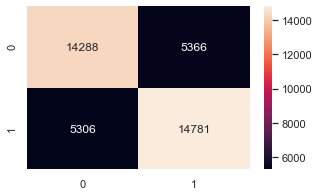

In [133]:
cf_matrix = metrics.confusion_matrix(ytest, ypred)
plt.figure(figsize=(5,3))
sns.heatmap(cf_matrix, annot=True, fmt = ".0f")

Ahora vemos qué importancia tiene cada variable en este modelo.

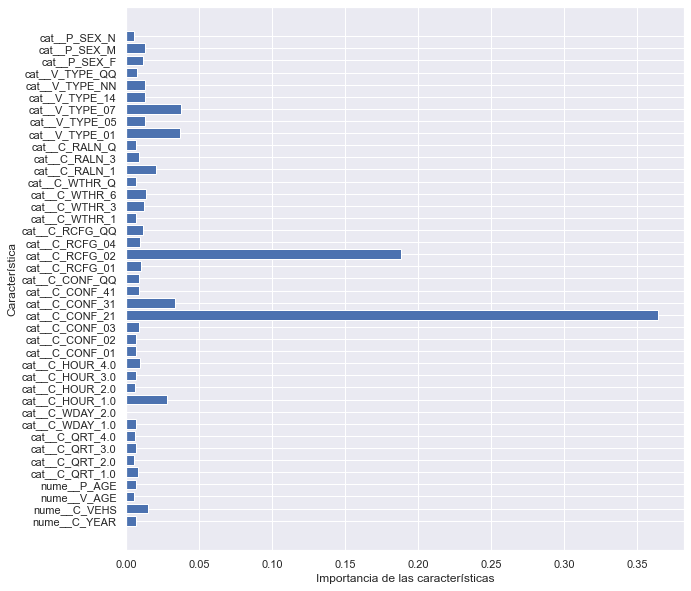

In [134]:
imp=modelo4.named_steps['clasificador'].feature_importances_
car=modelo4.named_steps['preprocesador'].get_feature_names_out()

plt.figure(figsize=(10,10))
plt.barh(np.arange(len(car)), imp)
plt.yticks(np.arange(len(car)),car)
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')
plt.show()

Como podemos ver que el accidente haya sido en una intersección y el sentido de los coches son las variables que mejor discriminan, no obstante destacar que este modelo también utiliza la información de que vehículos son los que han sufrido el accidente a la hora de decidir (si un vehiculo pesado o un turismo.

Obtenemos la curva ROC

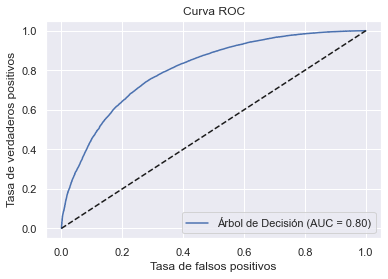

In [135]:
# Obtener las probabilidades de las clases positivas
y_probs = modelo4.predict_proba(xtest)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(ytest, y_probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(ytest, y_probs)

# Trazar la curva ROC
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Línea base
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.show()

Al igual que en los anteriores modelos, obtenemos un AUC razonablemente bueno.

#### Red Neuronal

In [136]:
from sklearn.neural_network import MLPClassifier

Hacemos una primera prueba sin búsqueda de hiperpámetros.

In [137]:
clasificador = MLPClassifier()

modelo51 = Pipeline(steps=[('preprocesador', preprocessor),
                          ('clasificador', clasificador)])

modelo51.fit(xtrain,ytrain)

ypred = modelo51.predict(xtest)
ypred_proba = modelo51.predict_proba(xtest)

score_modelo51 = modelo51.score(xtest, ytest)
score_train_modelo51 = modelo51.score(xtrain, ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo51)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo51)

Score en datos de test: 0.7186
Score en datos de entrenamiento: 0.7437


Vemos que en general para todos los modelos la precisión es similar, pero aun así vamos a hacer una búsqueda de hiperparámetros.

In [138]:
clasificador = MLPClassifier(learning_rate_init=0.01,
                        solver = 'lbfgs',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123)

modelo5 = Pipeline(steps=[('preprocesador', preprocessor),
                          ('clasificador', clasificador)])

parametros = {'clasificador__hidden_layer_sizes':
              [1, 5, (5,5), 10, (10,10), 20]}

grid_search = GridSearchCV(modelo5, parametros, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)

print("Mejor valor para hidden_layer_sizes:", grid_search.best_params_['clasificador__hidden_layer_sizes'])

Mejor valor para hidden_layer_sizes: 20


Obtenemos las métricas para el modelo con mejor tamaño y cantidad de capas ocultas.

In [139]:
clasificador = MLPClassifier(learning_rate_init=0.01,
                        solver = 'lbfgs',
                        hidden_layer_sizes=20,
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123)

modelo5 = Pipeline(steps=[('preprocesador', preprocessor),
                          ('clasificador', clasificador)])

modelo5.fit(xtrain, ytrain)

score_modelo5 = modelo5.score(xtest,ytest)
score_train_modelo5 = modelo5.score(xtrain,ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo5)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo5)

Score en datos de test: 0.7184
Score en datos de entrenamiento: 0.7275


Comprobamos que no hay sobreajuste.

Obtenemos el resto de métricas:

In [140]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71     19654
           1       0.72      0.73      0.72     20087

    accuracy                           0.72     39741
   macro avg       0.72      0.72      0.72     39741
weighted avg       0.72      0.72      0.72     39741



Calculamos la **matriz de confusión**.

<AxesSubplot:>

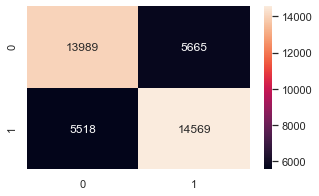

In [141]:
cf_matrix = metrics.confusion_matrix(ytest, ypred)
plt.figure(figsize=(5,3))
sns.heatmap(cf_matrix, annot=True, fmt = ".0f")

Obtenemos la curva ROC

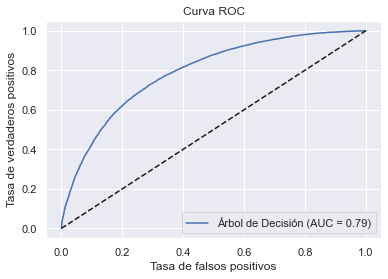

In [143]:
# Obtener las probabilidades de las clases positivas
y_probs = modelo5.predict_proba(xtest)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(ytest, y_probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(ytest, y_probs)

# Trazar la curva ROC
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Línea base
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.show()

Al igual que en los anteriores modelos, obtenemos un AUC razonablemente bueno.

### Modelo para detectar si se va a necesitar tratamiento médico

Ahora pasamos a estudiar el otro conjunto de datos que habíamos creado.

Predicción de tratamiento (detectar si va a ser necesario tratamiento)

In [96]:
dfISEV

,C_YEAR,C_QRT,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RALN,V_TYPE,V_AGE,P_SEX,P_AGE,P_ISEV
5,1999,1.0,1.0,3.0,3.0,QQ,QQ,1,1,01,15.0,M,28.0,1
6,1999,1.0,1.0,3.0,3.0,QQ,QQ,1,1,01,8.0,M,21.0,1
42,1999,1.0,1.0,3.0,1.0,03,QQ,1,3,01,6.0,F,25.0,2
43,1999,1.0,1.0,2.0,1.0,03,QQ,1,1,01,1.0,M,65.0,2
44,1999,1.0,1.0,3.0,1.0,QQ,01,1,1,01,4.0,M,17.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5742593,2014,4.0,2.0,3.0,2.0,41,01,1,1,05,6.0,M,44.0,1
5742594,2014,4.0,2.0,3.0,2.0,41,01,1,1,05,6.0,M,34.0,2
5742595,2014,4.0,2.0,4.0,1.0,03,01,1,3,01,13.0,F,35.0,2
5742596,2014,4.0,2.0,4.0,1.0,03,01,1,3,01,13.0,M,26.0,1


In [97]:
dfISEV['P_ISEV'].value_counts()

2    2393759
1    1798084
N     181574
3      33593
Name: P_ISEV, dtype: int64

Como vemos tenemos cuatro valores posibles, como lo que nos interesa es distinguir cuando se va a necesitar tratamiento, dividiremos estos cuatro valores en dos y dos (no se necesita tratamiento o es de un vehiculo estacionado y se necesita tratamiento o ha fallecido).  

In [98]:
dfISEV['P_ISEV'] = dfISEV['P_ISEV'].replace({'1':0,'N':0,'2':1,'3':1})

Dividimos en:
- No se necesita tratamiento o es de un vehiculo estacionado (0)
- Se necesita tratamiento o ha fallecido (1)

In [99]:
dfISEV['P_ISEV'].value_counts()/len(dfISEV['P_ISEV'])

1    0.550793
0    0.449207
Name: P_ISEV, dtype: float64

Como  vemos tenemos una muestra algo desbalanceada, por ello vamos a balancearla, como tenemos bastantes datos, lo haremos por el método de under sampling.

In [100]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 0)
rus.fit_resample(dfISEV, dfISEV['P_ISEV'])
print('Filas que nos quedamos:', len(rus.sample_indices_))

Filas que nos quedamos: 3959316


<AxesSubplot:>

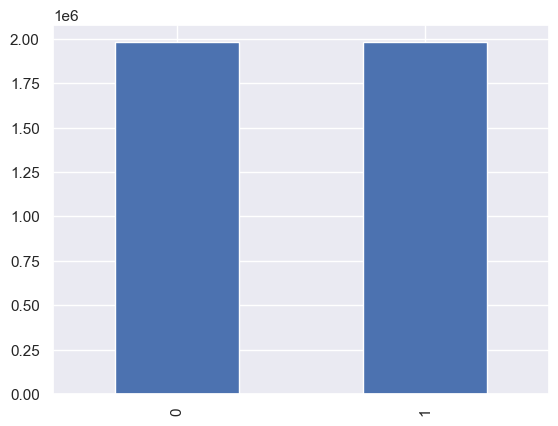

In [101]:
dfISEVunder= dfISEV.iloc[rus.sample_indices_]
dfISEVunder['P_ISEV'].value_counts().plot.bar()

Normalizamos las variables numéricas y hacemosun one hot encoding para las categóricas.

In [102]:
categoricas = list(dfISEVunder.select_dtypes(include=['object'], exclude=np.number).columns)
numericas = list(dfISEVunder.select_dtypes(exclude=['object'], include=np.number).columns)
print(categoricas, numericas)

['C_QRT', 'C_WDAY', 'C_HOUR', 'C_CONF', 'C_RCFG', 'C_WTHR', 'C_RALN', 'V_TYPE', 'P_SEX'] ['C_YEAR', 'C_VEHS', 'V_AGE', 'P_AGE', 'P_ISEV']


In [103]:
numericas.remove('P_ISEV')

In [104]:
from sklearn import metrics
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [105]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('nume', numeric_transformer, numericas),
        ('cat', onehot_transformer, categoricas)])

Separamos el conjunto de datos.

In [106]:
xtrain, xtest, ytrain, ytest = train_test_split(dfISEVunder.drop(columns=['P_ISEV']), dfISEVunder['P_ISEV'], test_size=0.25, random_state=0)

### **Evaluación Algoritomos de Clasificación**

#### Árbol de Decisión Simple

In [134]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Hacemos una primera prueba sin búsqueda de la mejor profundidad.

In [108]:
modelo61 = Pipeline(steps=[
    ('preprocesador', preprocessor),
    ('clasificador', DecisionTreeClassifier(random_state=2105))])

modelo61.fit(xtrain, ytrain)

ypred = modelo61.predict(xtest)
ypred_proba = modelo61.predict_proba(xtest)

score_modelo61 = modelo61.score(xtest, ytest)
score_train_modelo61 = modelo61.score(xtrain, ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo61)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo61)

Score en datos de test: 0.5760
Score en datos de entrenamiento: 0.9575


La diferencia entre la métrica en los datos de entrenamiento y de test es bastante elevada, lo que nos indica que hay sobreajuste. Vamos a elegir una profundidad máxima al azar para ver si se corrige.

In [109]:
modelo62 = Pipeline(steps=[
    ('preprocesador', preprocessor),
    ('clasificador', DecisionTreeClassifier(max_depth=7,random_state=2105))])

modelo62.fit(xtrain, ytrain)

ypred = modelo62.predict(xtest)
ypred_proba = modelo62.predict_proba(xtest)

score_modelo62 = modelo62.score(xtest, ytest)
score_train_modelo62 = modelo62.score(xtrain, ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo62)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo62)

Score en datos de test: 0.6572
Score en datos de entrenamiento: 0.6581


Vemos que se corrige el sobreajuste ya que ahora no tenemos practicamente diferencia entre la métrica obtenida mediante los datos de entrenamiento y mediante los datos de test.

Por tanto, ahora elaboramos un modelo final para árboles de decisión simple haciendo una búsqueda de la mejor profundidad y obtenemos las métricas.

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
modelo6 = Pipeline([
    ('preprocesador', preprocessor),
    ('clasificador', DecisionTreeClassifier(random_state=2105))])

parametros = {'clasificador__max_depth': np.array(range(4,15))}

grid_search = GridSearchCV(modelo6, parametros, cv=5)
grid_search.fit(xtrain, ytrain)

print("Mejor valor para max_depth encontrado:", grid_search.best_params_['clasificador__max_depth'])

Mejor valor para max_depth encontrado: 13


In [135]:
modelo6 = Pipeline(steps=[
    ('preprocesador', preprocessor),
    ('clasificador', DecisionTreeClassifier(max_depth=13,random_state=2105))])

modelo6.fit(xtrain, ytrain)

ypred = modelo6.predict(xtest)
ypred_proba = modelo6.predict_proba(xtest)

score_modelo6 = modelo6.score(xtest, ytest)
score_train_modelo6 = modelo6.score(xtrain, ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo6)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo6)

Score en datos de test: 0.6631
Score en datos de entrenamiento: 0.6669


Comprobamos que no hay sobreajuste.

Obtenemos el resto de métricas:

In [136]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68    494216
           1       0.68      0.61      0.65    495613

    accuracy                           0.66    989829
   macro avg       0.66      0.66      0.66    989829
weighted avg       0.66      0.66      0.66    989829



Calculamos la **matriz de confusión**.

<AxesSubplot:>

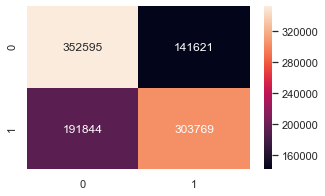

In [137]:
cf_matrix = metrics.confusion_matrix(ytest, ypred)
plt.figure(figsize=(5,3))
sns.heatmap(cf_matrix, annot=True, fmt = ".0f")

Ahora vemos qué importancia tiene cada variable en este modelo.

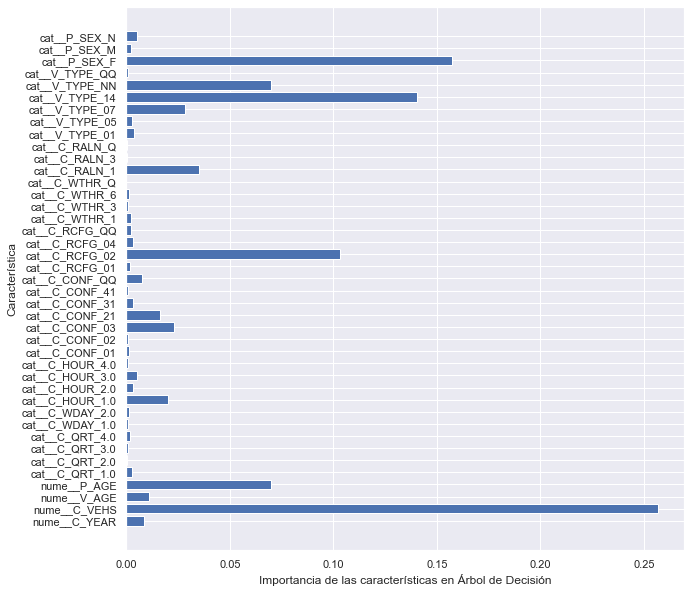

In [138]:
imp=modelo6.named_steps['clasificador'].feature_importances_
car=modelo6.named_steps['preprocesador'].get_feature_names_out()

plt.figure(figsize=(10,10))
plt.barh(np.arange(len(car)), imp)
plt.yticks(np.arange(len(car)),car)
plt.xlabel('Importancia de las características en Árbol de Decisión')
plt.ylabel('Característica')
plt.show()

Las variables más importantes según este modelo a la hora de ver si es necesario tratamiento son el número de vehiculos involucrados en la colisión, si se ha producido en una intersección y si el vehiculo es una moto,bici o similar.

Calculamos la curva ROC

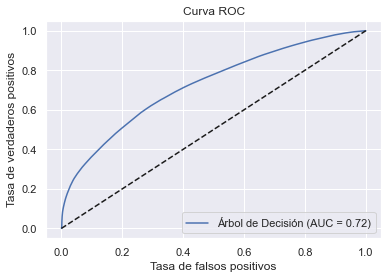

In [139]:
# Obtener las probabilidades de las clases positivas
y_probs = modelo6.predict_proba(xtest)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(ytest, y_probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(ytest, y_probs)

# Trazar la curva ROC
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Línea base
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.show()

Podemos observar una capacidad de discriminación buena, al haber obtenido un AUC de 0.72

#### Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

Hacemos una primera prueba sin búsqueda de la mejor profundidad.

In [108]:
modelo71 = Pipeline(steps=[
    ('preprocesador', preprocessor),
    ('clasificador', RandomForestClassifier(random_state=2105))])

modelo71.fit(xtrain,ytrain)

ypred = modelo71.predict(xtest)
ypred_proba = modelo71.predict_proba(xtest)

score_modelo71 = modelo71.score(xtest, ytest)
score_train_modelo71 = modelo71.score(xtrain, ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo71)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo71)

Score en datos de test: 0.6182
Score en datos de entrenamiento: 0.9575


Vemos que hay sobreajuste, por lo que vamos a realizar una búqueda de profundidad para intentar solucionarlo.

In [111]:
modelo7 = Pipeline([
    ('preprocesador', preprocessor),
    ('clasificador', RandomForestClassifier(random_state=2105))])

parametros = {'clasificador__max_depth': [11,12,13]}

grid_search = GridSearchCV(modelo7, parametros, cv=5)
grid_search.fit(xtrain, ytrain)


print("Mejor valor para max_depth encontrado:", grid_search.best_params_['clasificador__max_depth'])

Mejor valor para max_depth encontrado: 13


Obtenemos las métricas para el modelo con la mejor profundidad obtenida.

In [113]:
modelo7 = Pipeline([
    ('preprocesador', preprocessor),
    ('clasificador', RandomForestClassifier(max_depth=13,random_state=2105))])

modelo7.fit(xtrain,ytrain)

ypred = modelo7.predict(xtest)
ypred_proba = modelo7.predict_proba(xtest)

score_modelo7 = modelo7.score(xtest, ytest)
score_train_modelo7 = modelo7.score(xtrain, ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo7)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo7)

Score en datos de test: 0.6638
Score en datos de entrenamiento: 0.6665


Comprobamos quese ha eliminado el sobreajuste.

Obtenemos el resto de métricas:

In [115]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67    494216
           1       0.68      0.63      0.65    495613

    accuracy                           0.66    989829
   macro avg       0.66      0.66      0.66    989829
weighted avg       0.66      0.66      0.66    989829



Calculamos la **matriz de confusión**.

<AxesSubplot:>

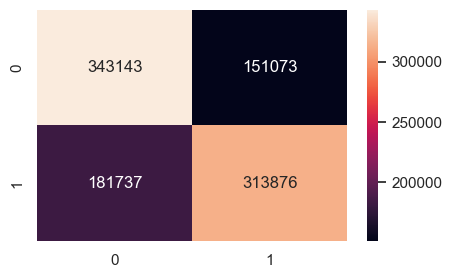

In [116]:
cf_matrix = metrics.confusion_matrix(ytest, ypred)
plt.figure(figsize=(5,3))
sns.heatmap(cf_matrix, annot=True, fmt = ".0f")

Ahora vemos qué importancia tiene cada variable en este modelo.

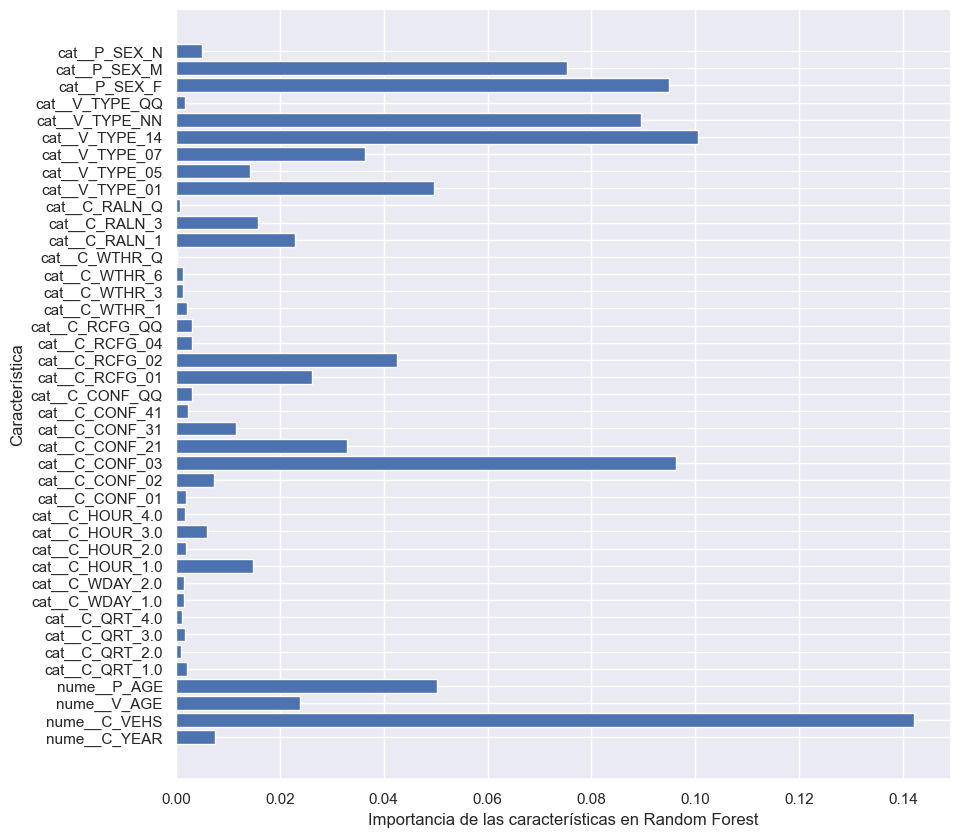

In [117]:
imp=modelo7.named_steps['clasificador'].feature_importances_
car=modelo7.named_steps['preprocesador'].get_feature_names_out()

plt.figure(figsize=(10,10))
plt.barh(np.arange(len(car)), imp)
plt.yticks(np.arange(len(car)),car)
plt.xlabel('Importancia de las características en Random Forest')
plt.ylabel('Característica')
plt.show()

Las variables más importantes según este modelo para ver si es necesario tratamiento son el numero de vehiculos involucrados en la colisión, si el vehiculo era una moto o similar si el registro es de una persona o un vehiculo y si el hacidente fue salirse de la calzada.

Obtenemos la curva ROC

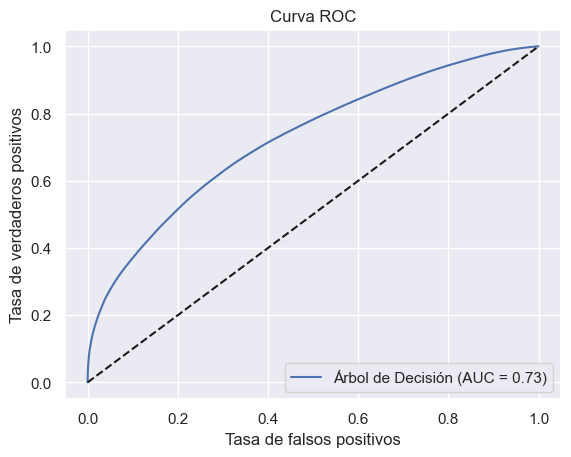

In [119]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener las probabilidades de las clases positivas
y_probs = modelo7.predict_proba(xtest)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(ytest, y_probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(ytest, y_probs)

# Trazar la curva ROC
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Línea base
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.show()

Al igual que en el anterior modelo, obtenemos un AUC razonablemente bueno.

#### Regresión Logística

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
modelo8 = Pipeline(steps=[
    ('preprocesador', preprocessor),
    ('clasificador', LogisticRegression(max_iter=1000))])

modelo8.fit(xtrain, ytrain)

ypred = modelo8.predict(xtest)
ypred_proba = modelo8.predict_proba(xtest)

score_modelo8 = modelo8.score(xtest, ytest)
score_train_modelo8 = modelo8.score(xtrain, ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo8)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo8)

Score en datos de test: 0.6422
Score en datos de entrenamiento: 0.6430


Vemos que no hay sobreajuste.

Obtenemos el resto de métricas:

In [122]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.63      0.68      0.66    494216
           1       0.65      0.60      0.63    495613

    accuracy                           0.64    989829
   macro avg       0.64      0.64      0.64    989829
weighted avg       0.64      0.64      0.64    989829



Calculamos la **matriz de confusión**.

<AxesSubplot:>

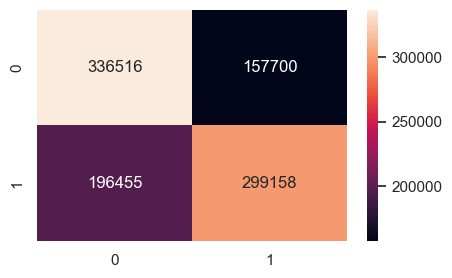

In [123]:
cf_matrix = metrics.confusion_matrix(ytest, ypred)
plt.figure(figsize=(5,3))
sns.heatmap(cf_matrix, annot=True, fmt = ".0f")

Ahora vemos qué importancia tiene cada variable en este modelo.
En regresión logística no podemos obtener directamente feature_importances_

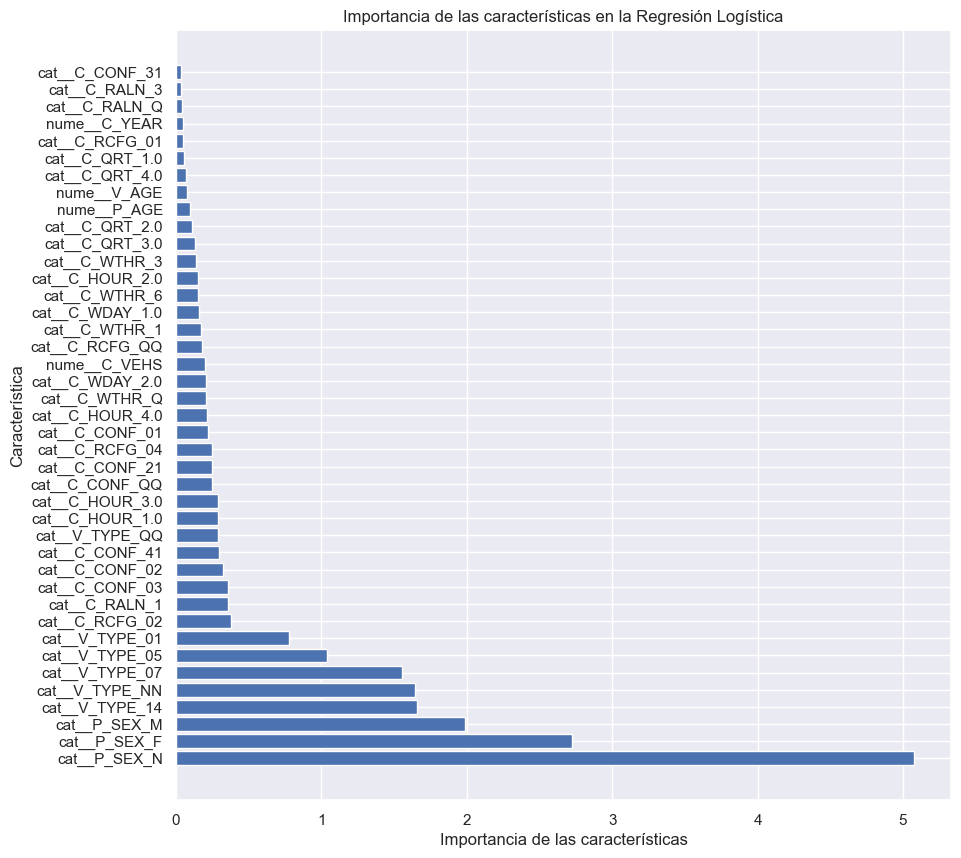

In [124]:
modelo8.named_steps['preprocesador'].get_feature_names_out()

logistic_regression = modelo8.named_steps['clasificador']
coeficientes = logistic_regression.coef_
nombres_caracteristicas = modelo8.named_steps['preprocesador'].get_feature_names_out()
importancias = list(zip(nombres_caracteristicas, abs(coeficientes[0])))
importancias_ordenadas = sorted(importancias, key=lambda x: x[1], reverse=True)

caracteristicas = [c[0] for c in importancias_ordenadas]
importancias = [c[1] for c in importancias_ordenadas]

#Hacemos el gráfico
plt.figure(figsize=(10,10))
plt.barh(range(len(caracteristicas)), importancias, align='center')
plt.yticks(range(len(caracteristicas)), caracteristicas)
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')
plt.title('Importancia de las características en la Regresión Logística')
plt.show()


Vemos que las variables más importantes para este modelo son el tipo de vehiculo y di el registro pertenece a una persona o a un vehiculo estacionado.

Calculamos ahora la curva ROC

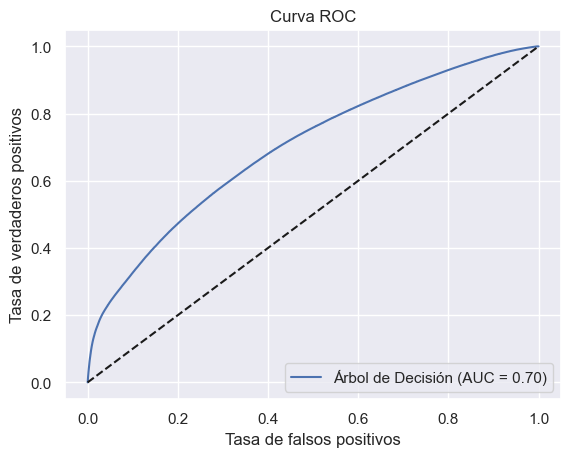

In [125]:
# Obtener las probabilidades de las clases positivas
y_probs = modelo8.predict_proba(xtest)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(ytest, y_probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(ytest, y_probs)

# Trazar la curva ROC
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Línea base
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.show()

Obtenemos un AUC similar a los anteriores modelos.

#### XGBoost

In [126]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

Hacemos una primera prueba sin búsqueda de hiperpámetros, posteriormente realizaremos una búqueda de la mejor tasa de aprendizaje (learning_rate) y la profunidad máxima (max_depth).

In [127]:
clasificador = XGBClassifier(random_state=2105)

modelo91 = Pipeline(steps=[('preprocesador', preprocessor),
                          ('clasificador', clasificador)])

encoder = LabelEncoder()
ytrain_encoded = encoder.fit_transform(ytrain)
ytest_encoded = encoder.transform(ytest)

modelo91.fit(xtrain, ytrain_encoded)

ypred = modelo91.predict(xtest)
ypred_proba = modelo91.predict_proba(xtest)

score_modelo91 = modelo91.score(xtest, ytest_encoded)
score_train_modelo91 = modelo91.score(xtrain, ytrain_encoded)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo91)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo91)

Score en datos de test: 0.6673
Score en datos de entrenamiento: 0.6693


Vemos que no hay mucha diferencia entre el score obtenido mediante los datos de entrenamiento y los datos de test por tanto no hay mucho sobreajuste.

Ahora, realizamos una búqueda de hiperparámetros para ver si obtenemos mejores resultados.

In [128]:
clasificador = XGBClassifier(random_state=2105)

modelo9 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('clasificador', clasificador)])

parametros = {'clasificador__max_depth': [7,8,9,10],
            'clasificador__learning_rate': [0.1,0.01]}

grid_search = GridSearchCV(modelo9, parametros, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain_encoded)

print("Mejor valor para max_depth encontrado:", grid_search.best_params_['clasificador__max_depth'])
print("Mejor valor para learning_rate encontrado:", grid_search.best_params_['clasificador__learning_rate'])

Mejor valor para max_depth encontrado: 10
Mejor valor para learning_rate encontrado: 0.1


Obtenemos las métricas para el modelo con la mejores parámetros.

In [134]:
clasificador = XGBClassifier(max_depth = 10, learning_rate = 0.1,
                             random_state=2105)

modelo9 = Pipeline(steps=[('preprocesador', preprocessor),
                          ('clasificador', clasificador)])

modelo9.fit(xtrain, ytrain_encoded)

ypred = modelo9.predict(xtest)
ypred_proba = modelo9.predict_proba(xtest)

score_modelo9 = modelo9.score(xtest, ytest_encoded)
score_train_modelo9 = modelo9.score(xtrain, ytrain_encoded)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo9)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo9)

Score en datos de test: 0.6675
Score en datos de entrenamiento: 0.6717


Comprobamos que no hay sobreajuste.

Obtenemos el resto de métricas:

In [135]:
print(classification_report(ytest_encoded, ypred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68    494216
           1       0.68      0.62      0.65    495613

    accuracy                           0.67    989829
   macro avg       0.67      0.67      0.67    989829
weighted avg       0.67      0.67      0.67    989829



Calculamos la **matriz de confusión**.

<AxesSubplot:>

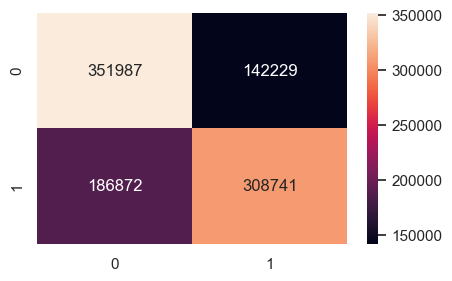

In [136]:
cf_matrix = metrics.confusion_matrix(ytest_encoded, ypred)
plt.figure(figsize=(5,3))
sns.heatmap(cf_matrix, annot=True, fmt = ".0f")

Ahora vemos qué importancia tiene cada variable en este modelo.

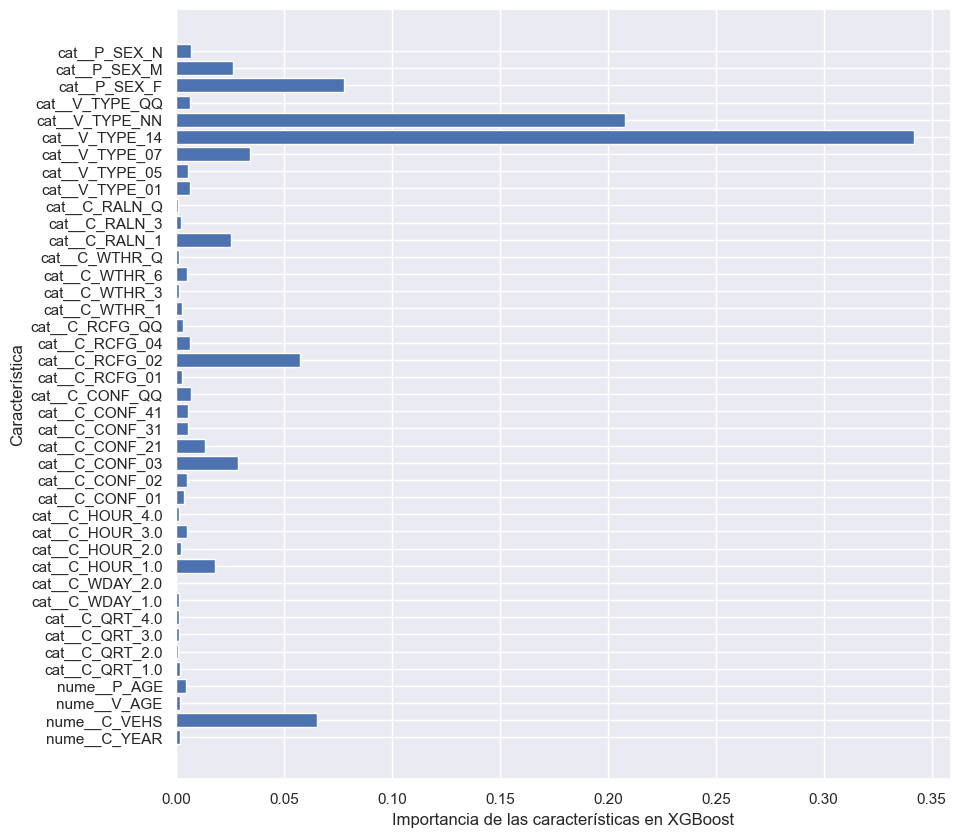

In [137]:
imp=modelo9.named_steps['clasificador'].feature_importances_
car=modelo9.named_steps['preprocesador'].get_feature_names_out()

plt.figure(figsize=(10,10))
plt.barh(np.arange(len(car)), imp)
plt.yticks(np.arange(len(car)),car)
plt.xlabel('Importancia de las características en XGBoost')
plt.ylabel('Característica')
plt.show()

Las variables más importantes según este modelo a la hora de ver si es necesario tratamiento son si el accidente se ha producido en una intersección de al menos dos vías públicas, el número de vehiculos y el tipo de vehiculo involucrado ( los mas determinantes son motos o similares o peatones).

Obtenemos la curva ROC

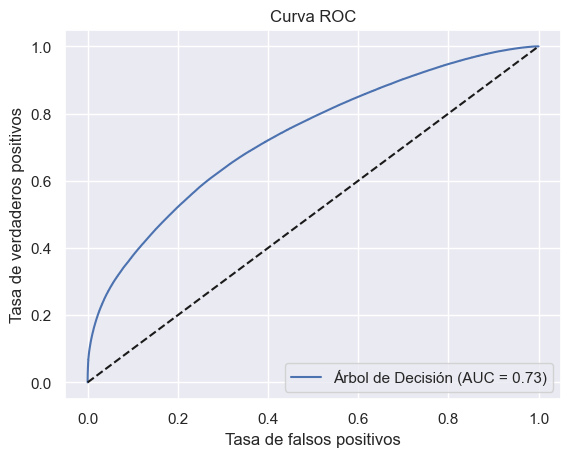

In [138]:
# Obtener las probabilidades de las clases positivas
y_probs = modelo9.predict_proba(xtest)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(ytest, y_probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(ytest, y_probs)

# Trazar la curva ROC
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Línea base
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.show()

Obtenemos un AUC similar a los anteriores modelos.

#### Red Neuronal

In [139]:
from sklearn.neural_network import MLPClassifier

Hacemos una primera prueba sin búsqueda de hiperpámetros.

In [140]:
clasificador = MLPClassifier()

modelo101 = Pipeline(steps=[('preprocesador', preprocessor),
                          ('clasificador', clasificador)])

modelo101.fit(xtrain,ytrain)

ypred = modelo101.predict(xtest)
ypred_proba = modelo101.predict_proba(xtest)

score_modelo101 = modelo101.score(xtest, ytest)
score_train_modelo101 = modelo101.score(xtrain, ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo101)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo101)

Score en datos de test: 0.6665
Score en datos de entrenamiento: 0.6679


Vemos que no hay mucha diferencia entre el score obtenido mediante los datos de entrenamiento y los datos de test por tanto no hay mucho sobreajuste.

Ahora, realizamos una búqueda de hiperparámetros para ver si obtenemos mejores resultados.

In [145]:
clasificador = MLPClassifier(learning_rate_init=0.01,
                        solver = 'lbfgs',
                        alpha  = 0,
                        max_iter = 10000,
                        random_state = 2105)

modelo10 = Pipeline(steps=[('preprocesador', preprocessor),
                          ('clasificador', clasificador)])

parametros = {'clasificador__hidden_layer_sizes':
              [1, 5, (5,5), 10, (10,10), 20]}

grid_search = GridSearchCV(modelo10, parametros, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)

print("Mejor valor para hidden_layer_sizes:", grid_search.best_params_['clasificador__hidden_layer_sizes'])

Mejor valor para hidden_layer_sizes: 20


Obtenemos las métricas para el modelo con mejor tamaño y cantidad de capas ocultas.

In [146]:
clasificador = MLPClassifier(learning_rate_init=0.01,
                        solver = 'lbfgs',
                        hidden_layer_sizes=20,
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 2105)

modelo10 = Pipeline(steps=[('preprocesador', preprocessor),
                          ('clasificador', clasificador)])

modelo10.fit(xtrain, ytrain)

ypred = modelo10.predict(xtest)
ypred_proba = modelo10.predict_proba(xtest)

score_modelo10 = modelo10.score(xtest,ytest)
score_train_modelo10 = modelo10.score(xtrain,ytrain)

#Imprimimos los resultados de la evaluación
print('Score en datos de test: %.4f' % score_modelo10)
print('Score en datos de entrenamiento: %.4f' % score_train_modelo10)

Score en datos de test: 0.6656
Score en datos de entrenamiento: 0.6668


Comprobamos que no hay sobreajuste.

Obtenemos el resto de métricas:

In [147]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68    494216
           1       0.68      0.62      0.65    495613

    accuracy                           0.67    989829
   macro avg       0.67      0.67      0.66    989829
weighted avg       0.67      0.67      0.66    989829



Calculamos la **matriz de confusión**.

<AxesSubplot:>

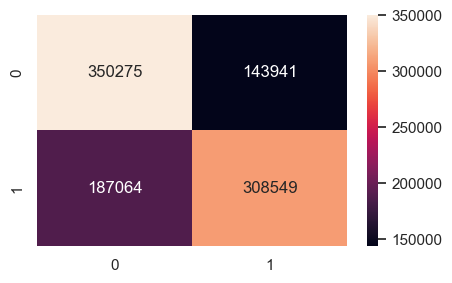

In [148]:
cf_matrix = metrics.confusion_matrix(ytest, ypred)
plt.figure(figsize=(5,3))
sns.heatmap(cf_matrix, annot=True, fmt = ".0f")

Ahora vemos qué importancia tiene cada variable en este modelo (primera capa). En redes neurales no podemos obtener directamente feature_importances_

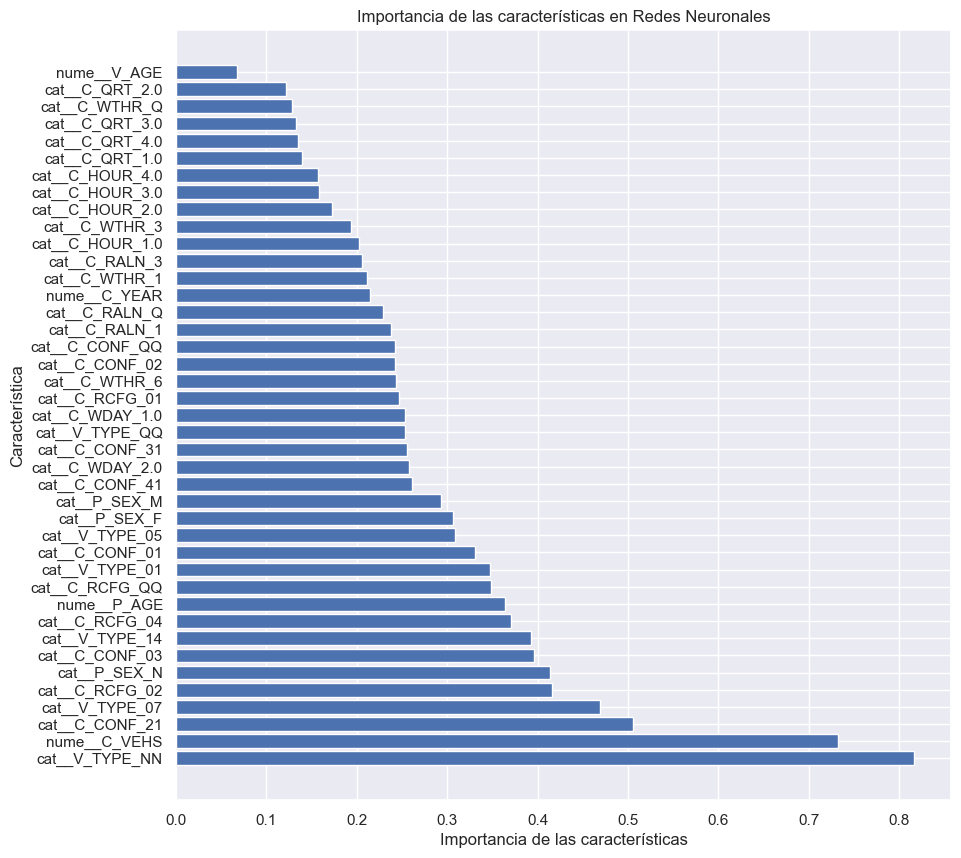

In [149]:
modelo10.named_steps['preprocesador'].get_feature_names_out()

red_neuronal = modelo10.named_steps['clasificador']
coeficientes = red_neuronal.coefs_[0]  # Coeficientes de la primera capa oculta
nombres_caracteristicas = modelo10.named_steps['preprocesador'].get_feature_names_out()

importancias = np.mean(np.abs(coeficientes), axis=1)
importancias_ordenadas = sorted(zip(nombres_caracteristicas, importancias), key=lambda x: x[1], reverse=True)

caracteristicas = [c[0] for c in importancias_ordenadas]
importancias = [c[1] for c in importancias_ordenadas]

#Hacemos el gráfico
plt.figure(figsize=(10, 10))
plt.barh(range(len(caracteristicas)), importancias, align='center')
plt.yticks(range(len(caracteristicas)), caracteristicas)
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')
plt.title('Importancia de las características en Redes Neuronales')
plt.show()

Calculamos la curva ROC

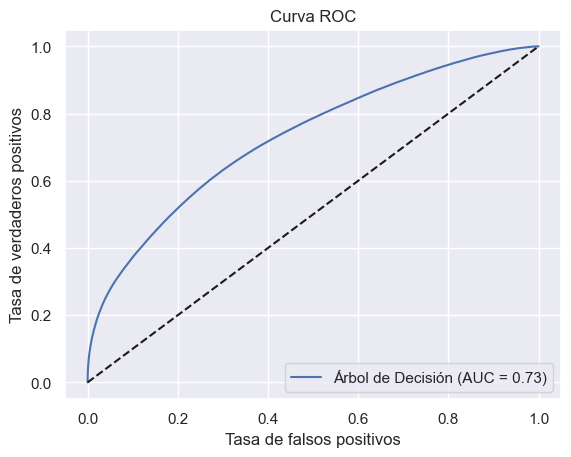

In [150]:
# Obtener las probabilidades de las clases positivas
y_probs = modelo10.predict_proba(xtest)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(ytest, y_probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(ytest, y_probs)

# Trazar la curva ROC
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Línea base
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.show()

Obtenemos un AUC similar a los anteriores modelos, razonablemente bueno.

Las características más importantes son si es un peaton, el número de vehiculos y si los coches iban en el mismo sentido.

### **Conclusiones**

Como resultados: Para el modelo para predecir si en un accidente va a haber una muerte, nos quedaremos con el modelo  de RandomForest con profundidad 13 ya que entre los modelos que más precisión daban era en el que menos diferencia entre la precisión de los datos de test y datos de entrenamiento habia, además las demás metricas como el recall salen en  todos los modelos en proporción con la precisión, es por ello que elejimos este modelo. También mencionar las variables más importantes para llevar esta clasificación son: si los vehiculos iban en la misma dirección, si el accidente se produjo en una intersección, la edad de los pasajeros y el número de vehiculos involucrados en la colisión.


Para el modelo para predecir si va a ser necesario tratamiento médico nos deberemos quedar con un modelo interpretable, debido a que esto va a suponer una subida el el coste del seguro de un cliente, entonces deberemos darle explicaciones, es por ello que nos quedaremos con el modelo árbol de decisión, que es muy interpretable. Como análisis podemos concluir que los accidentes que los factores que más influyen a la hora de detectar si en un accidente va a ser necesario tratamiento son si hay motociclistas o peatones involucrados, el número de vehiculos y si la colisión ha ocurrido en una intersección.